# Graphs Based on Correlation

In [244]:
import os
import anndata as ad
import scipy as sp
import pickle
import pandas as pd
import igraph as ig
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [245]:
"""
The data folder is structured as follows:

data
    |input
        |original
        |pb
        |pb_L
    |output
        |corr
        |gk
        |corr_L
        |graph_sum
        |extra
        |graph
        |plots
        |core_P
"""

data = os.path.abspath(os.path.join(os.getcwd(),"../data"))

input = os.path.join(data, "input")
output = os.path.join(data, "output")

original = os.path.join(input, "original")
pb = os.path.join(input, "pb")
pb_L = os.path.join(input, "pb_L")

corr = os.path.join(output, "corr")
gk = os.path.join(output, "gk")
corr_L = gk = os.path.join(output, "corr_L")
graph_sum = os.path.join(output, "graph_sum")
extra = os.path.join(output, "extra")
graph = os.path.join(output, "graph")
plots = os.path.join(output, "plots")
core_P = os.path.join(output, "core_P")

## Loading Data

In [246]:
# Read Original Data
adt = ad.read_h5ad(os.path.join(original, "adt_pp.h5ad"))
bulkRNA = ad.read_h5ad(os.path.join(original, "bulkRNA_pp.h5ad"))
cytof = ad.read_h5ad (os.path.join(original, "cytof_pp.h5ad"))
facs = ad.read_h5ad(os.path.join(original, "facs_pp.h5ad"))
luminex = ad.read_h5ad(os.path.join(original, "luminex_pp.h5ad"))
scRNA = ad.read_h5ad(os.path.join(original, "scRNA_pp.h5ad"))

/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation

In [247]:
# Read Pseudobulks
with open(os.path.join(core_P, "citeRNA_pseudobulks_core.pickle"), "rb") as f:
    citeRNA_pseudobulks = pickle.load(f) # Float

with open(os.path.join(core_P, "adt_pseudobulks_core.pickle"), "rb") as f:
    adt_pseudobulks = pickle.load(f) # Float

with open(os.path.join(core_P, "cytof_pseudobulks_core.pickle"), "rb") as f:
    cytof_pseudobulks = pickle.load(f) # Float

with open(os.path.join(core_P, "bulkRNA_pseudobulks_core.pickle"), "rb") as f:
    bulkRNA_pseudobulks = pickle.load(f) # Float

luminex_pseudobulks = pd.read_csv(os.path.join(core_P, "luminex_pseudobulks_core.csv"), index_col = 0) # Float
facs_pseudobulks = pd.read_csv(os.path.join(core_P, "facs_pseudobulks_core.csv"), index_col = 0)


In [248]:
# Correlations
with open(os.path.join(corr_L,'citeRNA_disease_clusters_corr.pickle'), 'rb') as f:
    citeRNA_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L,'corr_p_citeRNA.pickle'), 'rb') as f:
    corr_p_citeRNA = pickle.load(f)

with open(os.path.join(corr_L,'adt_disease_clusters_corr.pickle'), 'rb') as f:
    adt_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L,'corr_p_adt.pickle'), 'rb') as f:
    corr_p_adt = pickle.load(f)

with open(os.path.join(corr_L, 'cytof_disease_clusters_corr.pickle'), 'rb') as f:
    cytof_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_cytof.pickle'), 'rb') as f:
    corr_p_cytof = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_d_cytof.pickle'), 'rb') as f:
    corr_p_d_cytof = pickle.load(f)

with open(os.path.join(corr_L, 'bulkRNA_disease_clusters_corr.pickle'), 'rb') as f:
    bulkRNA_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_bulkRNA.pickle'), 'rb') as f:
    corr_p_bulkRNA = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_luminex.pickle'), 'rb') as f:
    corr_p_luminex = pickle.load(f)

with open(os.path.join(corr_L, 'luminex_disease_clusters_corr.pickle'), 'rb') as f:
    luminex_disease_clusters_corr = pickle.load(f)

with open(os.path.join(corr_L, 'corr_p_facs.pickle'), 'rb') as f:
    corr_p_facs = pickle.load(f)

with open(os.path.join(corr_L, 'facs_disease_clusters_corr.pickle'), 'rb') as f:
    facs_disease_clusters_corr = pickle.load(f)

corr_d_luminex = pd.read_csv(os.path.join(corr_L, "corr_d_luminex.csv"), index_col = 0) 
corr_d_facs = pd.read_csv(os.path.join(corr_L, "corr_d_facs.csv"), index_col = 0)
corr_p_d_facs = pd.read_csv(os.path.join(corr_L, "corr_p_d_facs.csv"), index_col = 0)
corr_p_d_luminex = pd.read_csv(os.path.join(corr_L, "corr_p_d_luminex.csv"), index_col = 0)

In [249]:
# Read Shared Data 
with open(os.path.join(core_P, "patient_disease_map_core.pickle"), "rb") as f:
    patient_disease_map = pickle.load(f) # Float

with open(os.path.join(core_P, "patient_disease_map_core_reduced.pickle"), "rb") as f:
    patient_disease_map_reduced = pickle.load(f) # Float

with open(os.path.join(core_P, "disease_patient_map_core.pickle"), "rb") as f:
    disease_patient_map = pickle.load(f) # Float

with open(os.path.join(core_P, "disease_patient_map_core_reduced.pickle"), "rb") as f:
    disease_patient_map_reduced = pickle.load(f) # Float

with open(os.path.join(core_P, "id_to_name.pickle"), "rb") as f:
    id_to_name = pickle.load(f) # Float

with open(os.path.join(core_P, "name_to_id.pickle"), "rb") as f:
    name_to_id = pickle.load(f) # Float

with open(os.path.join(core_P, "id_to_pb.pickle"), "rb") as f:
    id_to_pb = pickle.load(f) # Float

## Graph Computation
Only computes the percentiles

In [250]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(-1, 1)) # For rescaling the percentiles
id_to_graph_10 = {}
id_to_graph_5 = {}
id_to_num_com_corr_10 = {}
id_to_num_com_corr_5 = {}

id_to_graph_per_node_10 = {}
id_to_num_com_corr_per_node_10 = {}

id_to_graph_per_node_5 = {}
id_to_num_com_corr_per_node_5 = {}

### FACS

In [251]:
facs_graph_sum = {}
n_vertices = len(corr_p_facs.index.unique())
facs_graph_sum["num_vertices"] = n_vertices

In [252]:
corr = corr_p_facs.to_numpy()
data = np.triu(corr) # Avoiding duplicates, since the matrix is symmetric
data = data[data>0] # Discard negative correlation 
data = data[data<1] # Discard correlation with self

In [253]:
percentile = np.percentile(data, 90) 
data_10 = data [data >= percentile] # Extract the top 10% percent correlation  
edges = [(i,j) for i in range(n_vertices) for j in range(i) if corr_p_facs.iloc[i,j] >= percentile]
facs_graph_sum["10"] = {"corr_data": data_10, "percentile_threshhold": percentile, "edges": edges}

percentile = np.percentile(data, 95) 
data_5 = data [data >= percentile] # Extract the top 10% percent correlation  
edges = [(i,j) for i in range(n_vertices) for j in range(i) if corr_p_facs.iloc[i,j] >= percentile]
facs_graph_sum["5"] = {"corr_data": data_5, "percentile_threshhold": percentile, "edges": edges}

percentile = np.percentile(data, 97) 
data_3 = data [data >= percentile] # Extract the top 10% percent correlation  
edges = [(i,j) for i in range(n_vertices) for j in range(i) if corr_p_facs.iloc[i,j] >= percentile]
facs_graph_sum["3"] = {"corr_data": data_3, "percentile_threshhold": percentile, "edges": edges}

percentile = np.percentile(data, 99) 
data_1 = data [data >= percentile] # Extract the top 10% percent correlation  
edges = [(i,j) for i in range(n_vertices) for j in range(i) if corr_p_facs.iloc[i,j] >= percentile]
facs_graph_sum["1"] = {"corr_data": data_1, "percentile_threshhold": percentile, "edges": edges}

edges = []
for i, row in enumerate(corr):
    non_one_row = row[row<1] # remove self correlation
    percentile = np.percentile(non_one_row, 90) 
    for j, column in enumerate(row):
        if column < 1 and column > 0:
            if column >= percentile:
                edges.append((i,j))

facs_graph_sum["10 pn"] = {"edges": edges}

edges = []
for i, row in enumerate(corr):
    non_one_row = row[row<1] # remove self correlation
    percentile = np.percentile(non_one_row, 95) 
    for j, column in enumerate(row):
        if column < 1 and column > 0:
            if column >= percentile:
                edges.append((i,j))

facs_graph_sum["5 pn"] = {"edges": edges}

#### Rescaling

In [254]:
data_scaled = minmax_scale.fit_transform(corr_p_facs.to_numpy()).flatten()
facs_graph_sum["corr_scaled"] = data_scaled

In [255]:
percentile = np.percentile(data_scaled, 90) 
facs_graph_sum["10"]["percentile_threshhold_rescaled"] = percentile
data_rescaled = data_scaled [data_scaled >= percentile]
facs_graph_sum["10"]["data_rescaled"] = data_rescaled

percentile = np.percentile(data_scaled, 95) 
facs_graph_sum["5"]["percentile_threshhold_rescaled"] = percentile
data_rescaled = data_scaled [data_scaled >= percentile]
facs_graph_sum["5"]["data_rescaled"] = data_rescaled

percentile = np.percentile(data_scaled, 97) 
facs_graph_sum["3"]["percentile_threshhold_rescaled"] = percentile
data_rescaled = data_scaled [data_scaled >= percentile]
facs_graph_sum["3"]["data_rescaled"] = data_rescaled

percentile = np.percentile(data_scaled, 99) 
facs_graph_sum["1"]["percentile_threshhold_rescaled"] = percentile
data_rescaled = data_scaled [data_scaled >= percentile]
facs_graph_sum["1"]["data_rescaled"] = data_rescaled

#### Example Visualization

In [256]:
# Original Graph
g = ig.Graph(facs_graph_sum["num_vertices"], facs_graph_sum["10"]["edges"])
g["title"] = "FACS Network for Top 10 Edges"
g.vs["name"] = list(corr_p_facs.columns)
g.vs["disease"] =  [facs.obs.Diseases[facs.obs_names == name][0] for name in g.vs["name"] ]
g.vs["gender"] =  [facs.uns["experiment_info"][facs.uns["experiment_info"]["scRNASeq_sample_ID"] == name]["Sex"][0] for name in g.vs["name"] ]
g.vs["age"] = [facs.uns["experiment_info"][facs.uns["experiment_info"]["scRNASeq_sample_ID"] == name]["Age"][0] for name in g.vs["name"] ]

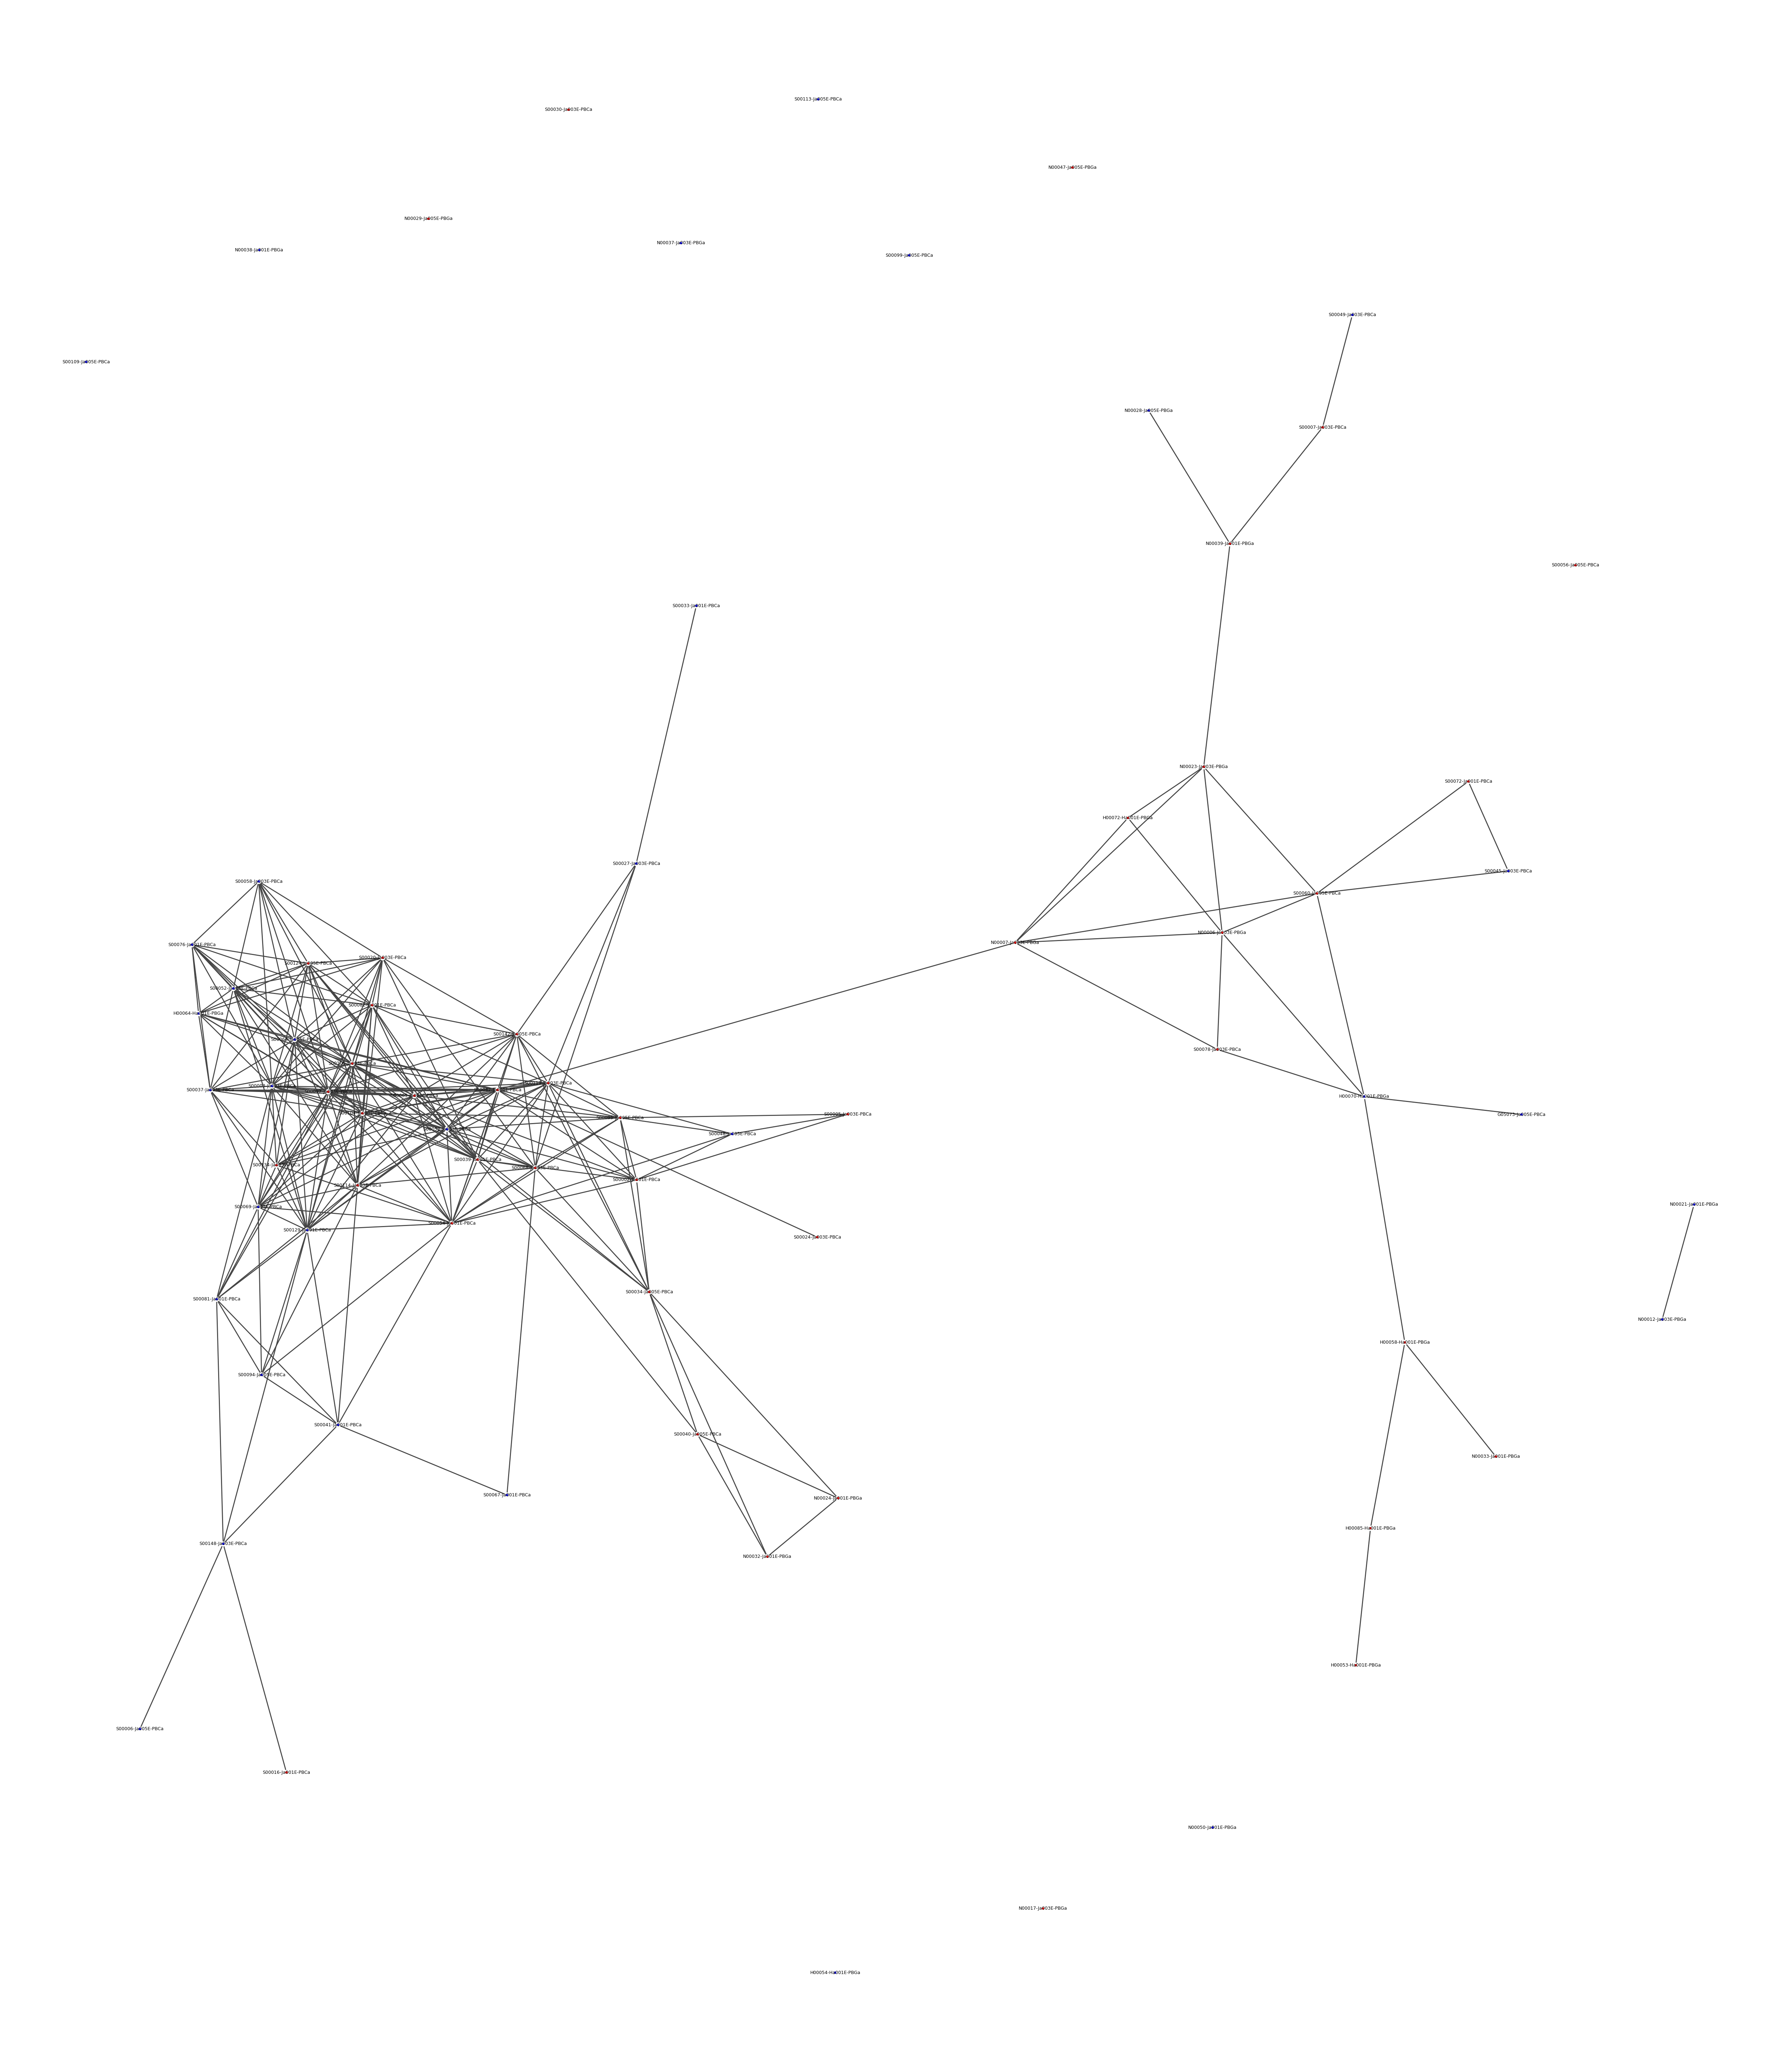

In [257]:
fig, ax = plt.subplots(figsize=(facs_graph_sum["num_vertices"],facs_graph_sum["num_vertices"]))
ig.plot(
    g,
    target=ax,
    layout="auto", 
    vertex_size=0.03,
    vertex_color=["blue" if gender == "F" else "red" for gender in g.vs["gender"]],
    vertex_frame_width=3.0,
    vertex_frame_color="white",
    vertex_label=g.vs["name"],
    vertex_label_size=9.0,
)

plt.show()

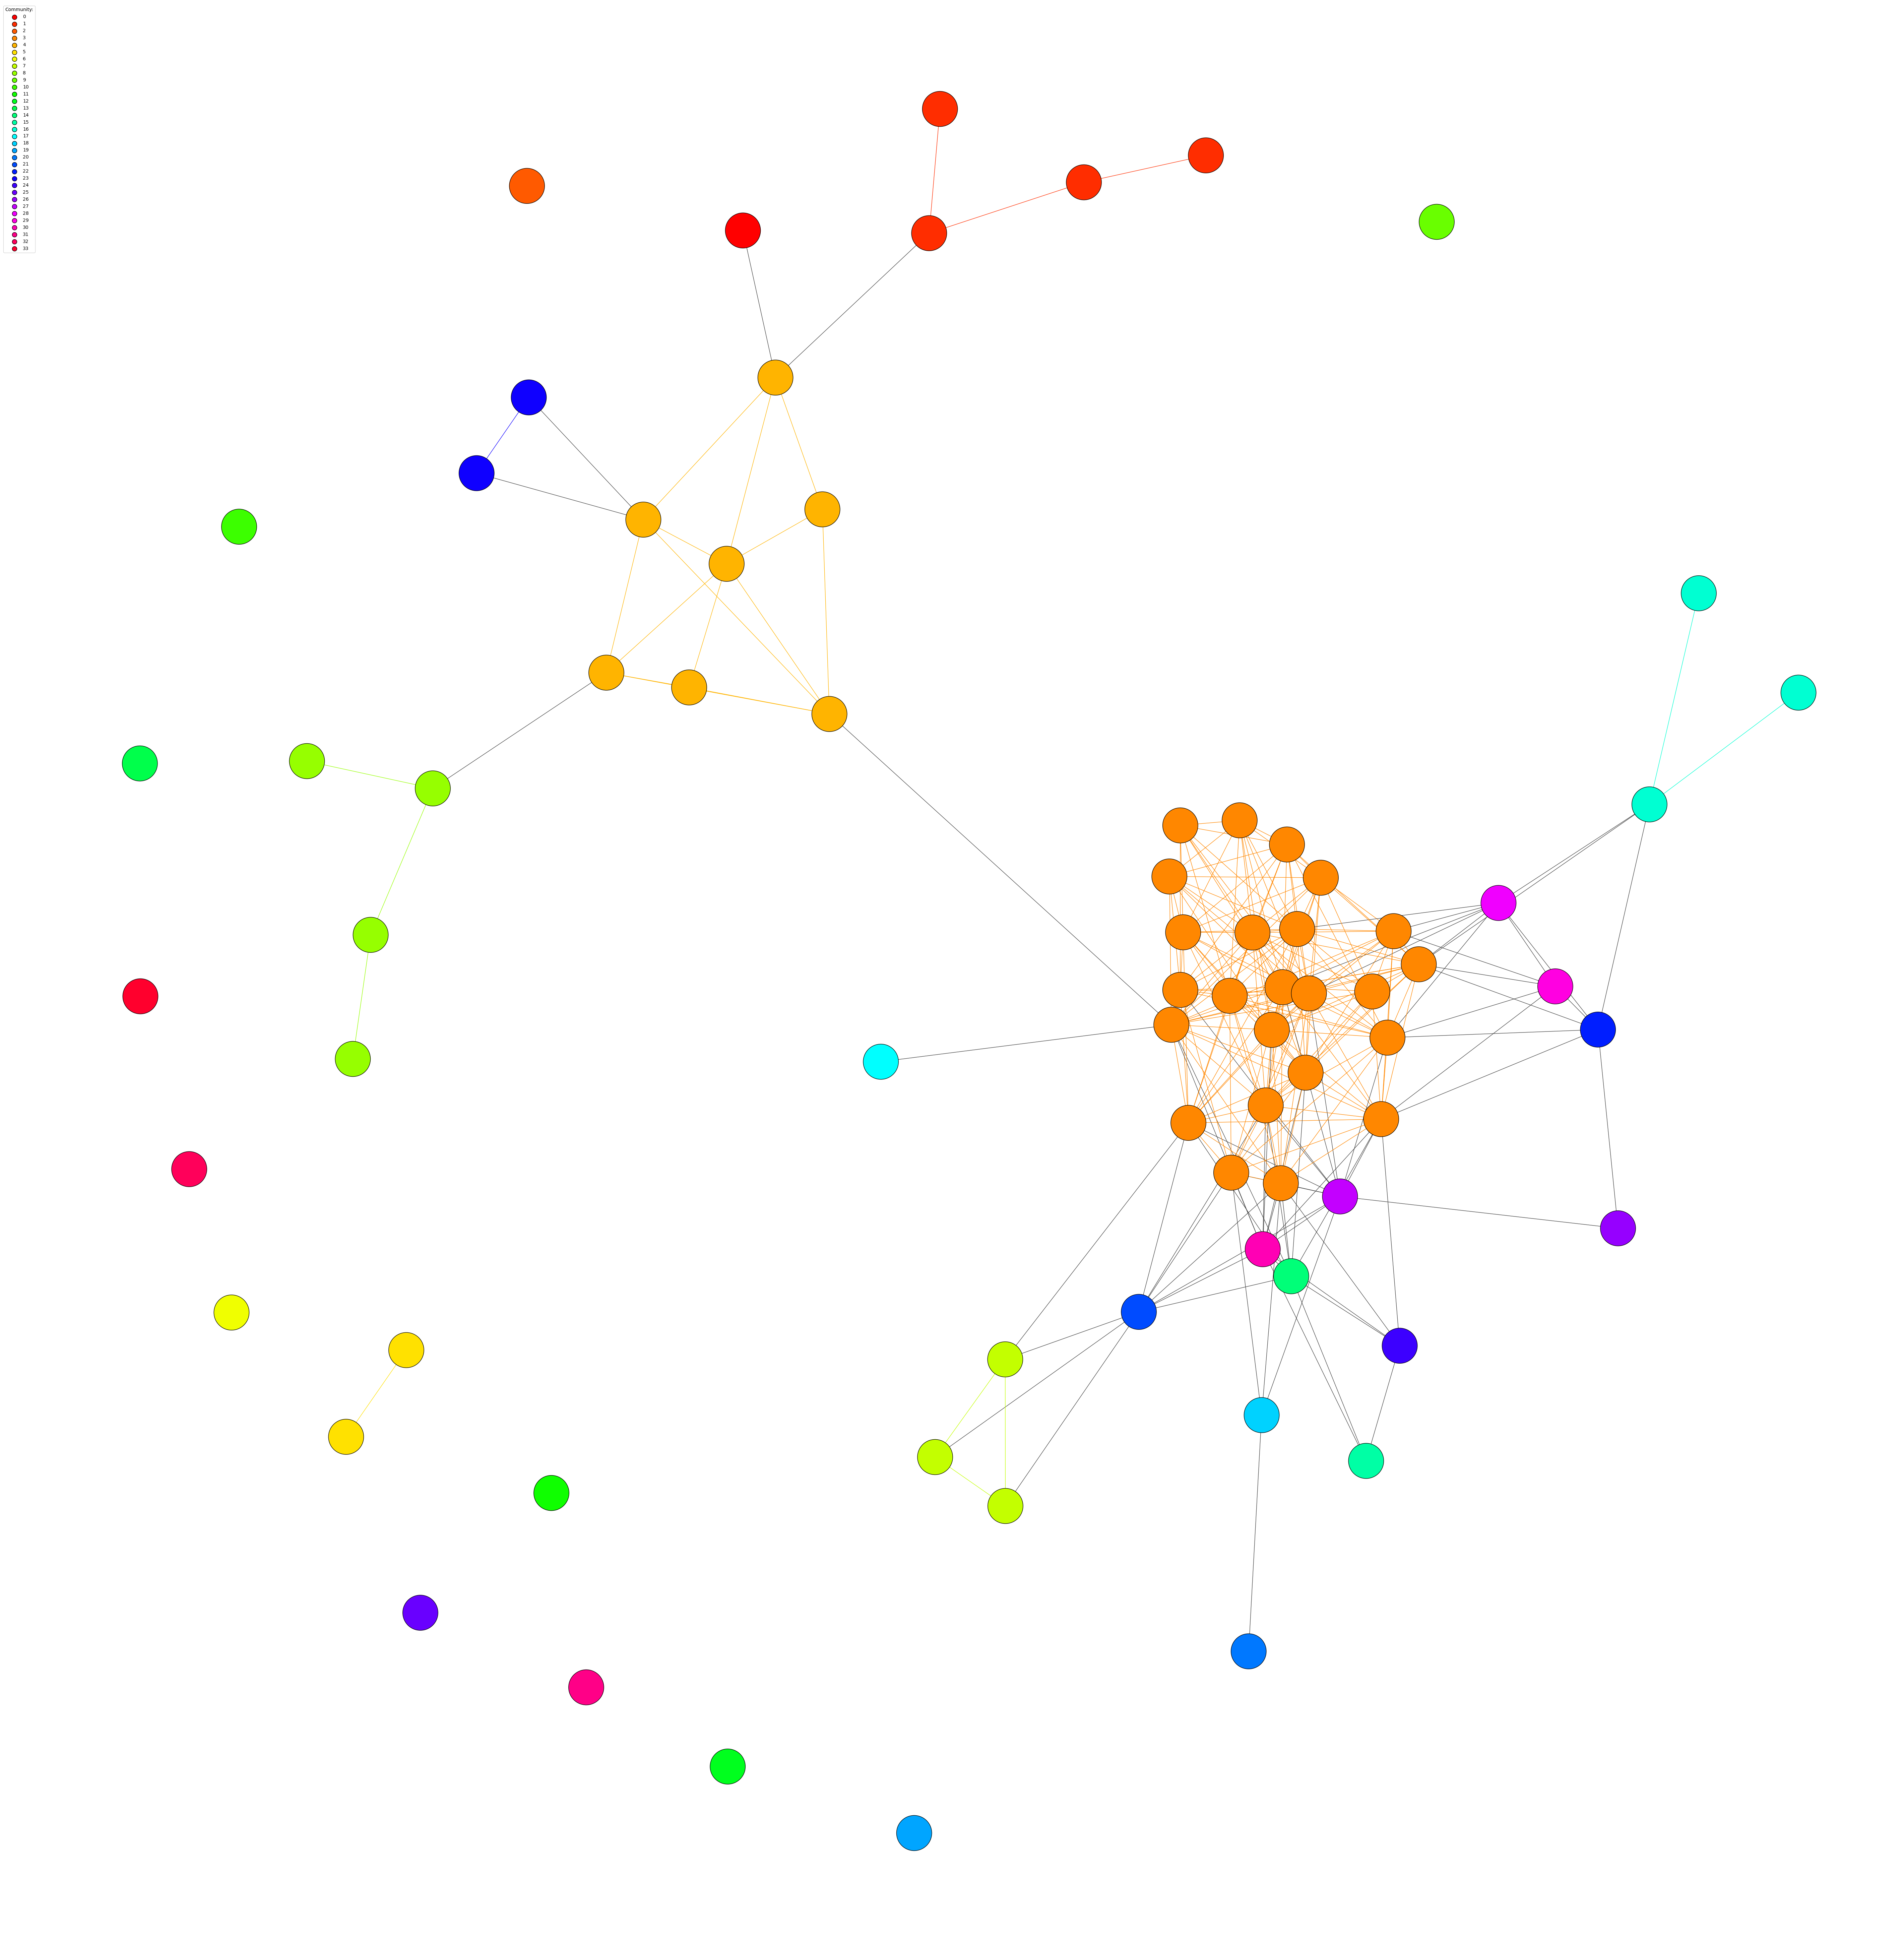

In [258]:
# Communities
communities = g.community_edge_betweenness()
communities = communities.as_clustering()

num_communities = len(communities)
palette = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i

fig, ax = plt.subplots(figsize=(facs_graph_sum["num_vertices"],facs_graph_sum["num_vertices"]))
ig.plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=0.3,
)

# Create a custom color legend
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)
plt.show()

### CyTOF

In [259]:
cytof_graph_sum = {}

for key in corr_p_cytof.keys():
    df = corr_p_cytof[key]
    n_vertices = len(df.index.unique())

    corr = df.to_numpy()
    data = np.triu(corr) # Avoiding duplicates, since the matrix is symmetric
    data = data[data>0] # Discard negative correlation 
    data = data[data<1] # Discard correlation with self

    percentile_10 = np.percentile(data, 90) 
    data_10 = data [data >= percentile_10] # Extract the top 10% percent correlation  
    edges_10 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_10]

    percentile_5 = np.percentile(data, 95) 
    data_5 = data [data >= percentile_5] # Extract the top 5% percent correlation  
    edges_5 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_5]

    percentile_3 = np.percentile(data, 97) 
    data_3 = data [data >= percentile_3] # Extract the top 3% percent correlation  
    edges_3 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_3]

    percentile_1 = np.percentile(data, 99) 
    data_1 = data [data >= percentile_1] # Extract the top 1% percent correlation  
    edges_1 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_1]

    edges_pn_10 = []
    for i, row in enumerate(corr):
        non_one_row = row[row<1] # remove self correlation
        percentile = np.percentile(non_one_row, 90) 
        for j, column in enumerate(row):
            if column < 1 and column > 0:
                if column >= percentile:
                    edges_pn_10.append((i,j))

    edges_pn_5 = []
    for i, row in enumerate(corr):
        non_one_row = row[row<1] # remove self correlation
        percentile = np.percentile(non_one_row, 95) 
        for j, column in enumerate(row):
            if column < 1 and column > 0:
                if column >= percentile:
                    edges_pn_5.append((i,j))

    cytof_graph_sum[key] = {"num_vertices": n_vertices, "10": {"corr_data": data_10, "percentile_threshhold": percentile_10, "edges": edges_10 }, "5": {"corr_data": data_5,  "percentile_threshhold": percentile_5, "edges": edges_5}, "3": {"corr_data": data_3, "percentile_threshhold": percentile_3, "edges": edges_3}, "1": {"corr_data": data_1, "percentile_threshhold": percentile_1, "edges": edges_1 }, "10 pn":{"edges": edges_pn_10}, "5 pn":{"edges": edges_pn_5} }


#### Rescaling

In [260]:
for key in corr_p_cytof.keys():
    df = corr_p_cytof[key]

    data_scaled = minmax_scale.fit_transform(df.to_numpy()).flatten()
    cytof_graph_sum[key]["corr_scaled"] = data_scaled

    percentile = np.percentile(data_scaled, 90) 
    cytof_graph_sum[key]["10"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    cytof_graph_sum[key]["10"]["data_rescaled"] = data_rescaled

    percentile = np.percentile(data_scaled, 95) 
    cytof_graph_sum[key]["5"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    cytof_graph_sum[key]["5"]["data_rescaled"] = data_rescaled

    percentile = np.percentile(data_scaled, 97) 
    cytof_graph_sum[key]["3"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    cytof_graph_sum[key]["3"]["data_rescaled"] = data_rescaled

    percentile = np.percentile(data_scaled, 99) 
    cytof_graph_sum[key]["1"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    cytof_graph_sum[key]["1"]["data_rescaled"] = data_rescaled

### ADT

In [261]:
adt_graph_sum = {}

for key in corr_p_adt.keys():
    df = corr_p_adt[key]
    n_vertices = len(df.index.unique())

    corr = df.to_numpy()
    data = np.triu(corr) # Avoiding duplicates, since the matrix is symmetric
    data = data[data>0] # Discard negative correlation 
    data = data[data<1] # Discard correlation with self

    percentile_10 = np.percentile(data, 90) 
    data_10 = data [data >= percentile_10] # Extract the top 10% percent correlation  
    edges_10 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_10]

    percentile_5 = np.percentile(data, 95) 
    data_5 = data [data >= percentile_5] # Extract the top 10% percent correlation  
    edges_5 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_5]

    percentile_3 = np.percentile(data, 97) 
    data_3 = data [data >= percentile_3] # Extract the top 10% percent correlation  
    edges_3 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_3]

    percentile_1 = np.percentile(data, 99) 
    data_1 = data [data >= percentile_1] # Extract the top 1% percent correlation  
    edges_1 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_1]

    edges_pn_10 = []
    for i, row in enumerate(corr):
        non_one_row = row[row<1] # remove self correlation
        percentile = np.percentile(non_one_row, 90) 
        for j, column in enumerate(row):
            if column < 1 and column > 0:
                if column >= percentile:
                    edges_pn_10.append((i,j))

    edges_pn_5 = []
    for i, row in enumerate(corr):
        non_one_row = row[row<1] # remove self correlation
        percentile = np.percentile(non_one_row, 95) 
        for j, column in enumerate(row):
            if column < 1 and column > 0:
                if column >= percentile:
                    edges_pn_5.append((i,j))

    adt_graph_sum[key] = {"num_vertices": n_vertices, "10": {"corr_data": data_10, "percentile_threshhold": percentile_10, "edges": edges_10 }, "5": {"corr_data": data_5,  "percentile_threshhold": percentile_5, "edges": edges_5}, "3": {"corr_data": data_3, "percentile_threshhold": percentile_3, "edges": edges_3}, "1": {"corr_data": data_1, "percentile_threshhold": percentile_1, "edges": edges_1}, "10 pn":{"edges": edges_pn_10}, "5 pn":{"edges": edges_pn_5} }


#### Rescaling

In [262]:
for key in corr_p_adt.keys():
    df = corr_p_adt[key]

    data_scaled = minmax_scale.fit_transform(df.to_numpy()).flatten()
    adt_graph_sum[key]["corr_scaled"] = data_scaled

    percentile = np.percentile(data_scaled, 90) 
    adt_graph_sum[key]["10"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    adt_graph_sum[key]["10"]["data_rescaled"] = data_rescaled

    percentile = np.percentile(data_scaled, 95) 
    adt_graph_sum[key]["5"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    adt_graph_sum[key]["5"]["data_rescaled"] = data_rescaled

    percentile = np.percentile(data_scaled, 97) 
    adt_graph_sum[key]["3"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    adt_graph_sum[key]["3"]["data_rescaled"] = data_rescaled

    percentile = np.percentile(data_scaled, 99) 
    adt_graph_sum[key]["1"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    adt_graph_sum[key]["1"]["data_rescaled"] = data_rescaled

### citeRNA

In [263]:
citeRNA_graph_sum = {}

for key in corr_p_citeRNA.keys():
    df = corr_p_citeRNA[key]
    n_vertices = len(df.index.unique())

    corr = df.to_numpy()
    data = np.triu(corr) # Avoiding duplicates, since the matrix is symmetric
    data = data[data>0] # Discard negative correlation 
    data = data[data<1] # Discard correlation with self

    percentile_10 = np.percentile(data, 90) 
    data_10 = data [data >= percentile_10] # Extract the top 10% percent correlation  
    edges_10 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_10]

    percentile_5 = np.percentile(data, 95) 
    data_5 = data [data >= percentile_5] # Extract the top 5% percent correlation  
    edges_5 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_5]

    percentile_3 = np.percentile(data, 97) 
    data_3 = data [data >= percentile_3] # Extract the top 3% percent correlation  
    edges_3 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_3]

    percentile_1 = np.percentile(data, 99) 
    data_1 = data [data >= percentile_1] # Extract the top 1% percent correlation  
    edges_1 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_1]

    edges_pn_10 = []
    for i, row in enumerate(corr):
        non_one_row = row[row<1] # remove self correlation
        if len(non_one_row) > 0:
            percentile = np.percentile(non_one_row, 90) 
            for j, column in enumerate(row):
                if column < 1 and column > 0:
                    if column >= percentile:
                        edges_pn_10.append((i,j))

    edges_pn_5 = []
    for i, row in enumerate(corr):
        non_one_row = row[row<1] # remove self correlation
        if len(non_one_row) > 0:
            percentile = np.percentile(non_one_row, 95) 
            for j, column in enumerate(row):
                if column < 1 and column > 0:
                    if column >= percentile:
                        edges_pn_5.append((i,j))

    citeRNA_graph_sum[key] = {"num_vertices": n_vertices, "10": {"corr_data": data_10, "percentile_threshhold": percentile_10, "edges": edges_10 }, "5": {"corr_data": data_5,  "percentile_threshhold": percentile_5, "edges": edges_5}, "3": {"corr_data": data_3, "percentile_threshhold": percentile_3, "edges": edges_3}, "1": {"corr_data": data_1, "percentile_threshhold": percentile_1, "edges": edges_1}, "10 pn":{"edges": edges_pn_10}, "5 pn":{"edges": edges_pn_5}}


#### Rescaling

In [264]:
for key in corr_p_citeRNA.keys():
    df = corr_p_citeRNA[key]

    data_scaled = minmax_scale.fit_transform(df.to_numpy()).flatten()
    citeRNA_graph_sum[key]["corr_scaled"] = data_scaled

    percentile = np.percentile(data_scaled, 90) 
    citeRNA_graph_sum[key]["10"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    citeRNA_graph_sum[key]["10"]["data_rescaled"] = data_rescaled

    percentile = np.percentile(data_scaled, 95) 
    citeRNA_graph_sum[key]["5"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    citeRNA_graph_sum[key]["5"]["data_rescaled"] = data_rescaled

    percentile = np.percentile(data_scaled, 97) 
    citeRNA_graph_sum[key]["3"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    citeRNA_graph_sum[key]["3"]["data_rescaled"] = data_rescaled

    percentile = np.percentile(data_scaled, 99) 
    citeRNA_graph_sum[key]["1"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    citeRNA_graph_sum[key]["1"]["data_rescaled"] = data_rescaled

/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


### bulkRNA

In [265]:
bulkRNA_graph_sum = {}

for key in corr_p_bulkRNA.keys():
    df = corr_p_bulkRNA[key]
    n_vertices = len(df.index.unique())

    corr = df.to_numpy()
    data = np.triu(corr) # Avoiding duplicates, since the matrix is symmetric
    data = data[data>0] # Discard negative correlation 
    data = data[data<1] # Discard correlation with self

    percentile_10 = np.percentile(data, 90) 
    data_10 = data [data >= percentile_10] # Extract the top 10% percent correlation  
    edges_10 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_10]

    percentile_5 = np.percentile(data, 95) 
    data_5 = data [data >= percentile_5] # Extract the top 5% percent correlation  
    edges_5 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_5]

    percentile_3 = np.percentile(data, 97) 
    data_3 = data [data >= percentile_3] # Extract the top 3% percent correlation  
    edges_3 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_3]

    percentile_1 = np.percentile(data, 99) 
    data_1 = data [data >= percentile_1] # Extract the top 1% percent correlation  
    edges_1 = [(i,j) for i in range(n_vertices) for j in range(i) if df.iloc[i,j] >= percentile_1]

    edges_pn_10 = []
    for i, row in enumerate(corr):
        non_one_row = row[row<1] # remove self correlation
        percentile = np.percentile(non_one_row, 90) 
        for j, column in enumerate(row):
            if column < 1 and column > 0:
                if column >= percentile:
                    edges_pn_10.append((i,j))

    edges_pn_5 = []
    for i, row in enumerate(corr):
        non_one_row = row[row<1] # remove self correlation
        percentile = np.percentile(non_one_row, 95) 
        for j, column in enumerate(row):
            if column < 1 and column > 0:
                if column >= percentile:
                    edges_pn_5.append((i,j))

    bulkRNA_graph_sum[key] = {"num_vertices": n_vertices, "10": {"corr_data": data_10, "percentile_threshhold": percentile_10, "edges": edges_10 }, "5": {"corr_data": data_5,  "percentile_threshhold": percentile_5, "edges": edges_5}, "3": {"corr_data": data_3, "percentile_threshhold": percentile_3, "edges": edges_3}, "1": {"corr_data": data_1, "percentile_threshhold": percentile_1, "edges": edges_1}, "10 pn":{"edges": edges_pn_10}, "5 pn":{"edges": edges_pn_5}}


In [266]:
edges_pn_5

[(0, 15),
 (0, 17),
 (0, 18),
 (0, 58),
 (0, 74),
 (1, 51),
 (1, 57),
 (1, 66),
 (1, 88),
 (1, 89),
 (2, 14),
 (2, 19),
 (2, 55),
 (2, 61),
 (2, 70),
 (3, 7),
 (3, 8),
 (3, 71),
 (3, 85),
 (3, 88),
 (4, 52),
 (4, 65),
 (4, 66),
 (4, 69),
 (4, 90),
 (5, 6),
 (5, 8),
 (5, 54),
 (5, 84),
 (5, 85),
 (6, 5),
 (6, 8),
 (6, 54),
 (6, 85),
 (6, 89),
 (7, 8),
 (7, 10),
 (7, 19),
 (7, 85),
 (7, 89),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 85),
 (8, 89),
 (9, 15),
 (9, 16),
 (9, 17),
 (9, 18),
 (9, 48),
 (10, 7),
 (10, 19),
 (10, 82),
 (10, 85),
 (10, 89),
 (11, 17),
 (11, 19),
 (11, 65),
 (11, 66),
 (11, 88),
 (12, 9),
 (12, 18),
 (12, 19),
 (12, 70),
 (12, 78),
 (13, 17),
 (13, 18),
 (13, 65),
 (13, 71),
 (13, 78),
 (14, 20),
 (14, 49),
 (14, 58),
 (14, 65),
 (14, 75),
 (15, 9),
 (15, 16),
 (15, 17),
 (15, 74),
 (15, 81),
 (16, 9),
 (16, 15),
 (16, 17),
 (16, 48),
 (16, 86),
 (17, 9),
 (17, 15),
 (17, 16),
 (17, 18),
 (17, 19),
 (18, 17),
 (18, 19),
 (18, 61),
 (18, 70),
 (18, 78),
 (19, 12),
 (19, 17)

#### Rescaling

In [267]:
for key in corr_p_bulkRNA.keys():
    df = corr_p_bulkRNA[key]

    data_scaled = minmax_scale.fit_transform(df.to_numpy()).flatten()
    bulkRNA_graph_sum[key]["corr_scaled"] = data_scaled

    percentile = np.percentile(data_scaled, 90) 
    bulkRNA_graph_sum[key]["10"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    bulkRNA_graph_sum[key]["10"]["data_rescaled"] = data_rescaled

    percentile = np.percentile(data_scaled, 95) 
    bulkRNA_graph_sum[key]["5"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    bulkRNA_graph_sum[key]["5"]["data_rescaled"] = data_rescaled

    percentile = np.percentile(data_scaled, 97) 
    bulkRNA_graph_sum[key]["3"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    bulkRNA_graph_sum[key]["3"]["data_rescaled"] = data_rescaled

    percentile = np.percentile(data_scaled, 99) 
    bulkRNA_graph_sum[key]["1"]["percentile_threshhold_rescaled"] = percentile
    data_rescaled = data_scaled [data_scaled >= percentile]
    bulkRNA_graph_sum[key]["1"]["data_rescaled"] = data_rescaled

#### Example Visuaization

In [268]:
# Original Graph
n_vertices = bulkRNA_graph_sum["cyan"]["num_vertices"]
edges = bulkRNA_graph_sum["cyan"]["1"]["edges"]

g = ig.Graph(n_vertices, edges)

g["title"] = "bulkRNA Network for cyan module and top 1 percent edges"
g.vs["name"] = list(df.columns)

# Communities
communities = g.community_edge_betweenness()
communities = communities.as_clustering()

num_communities = len(communities)
palette = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i

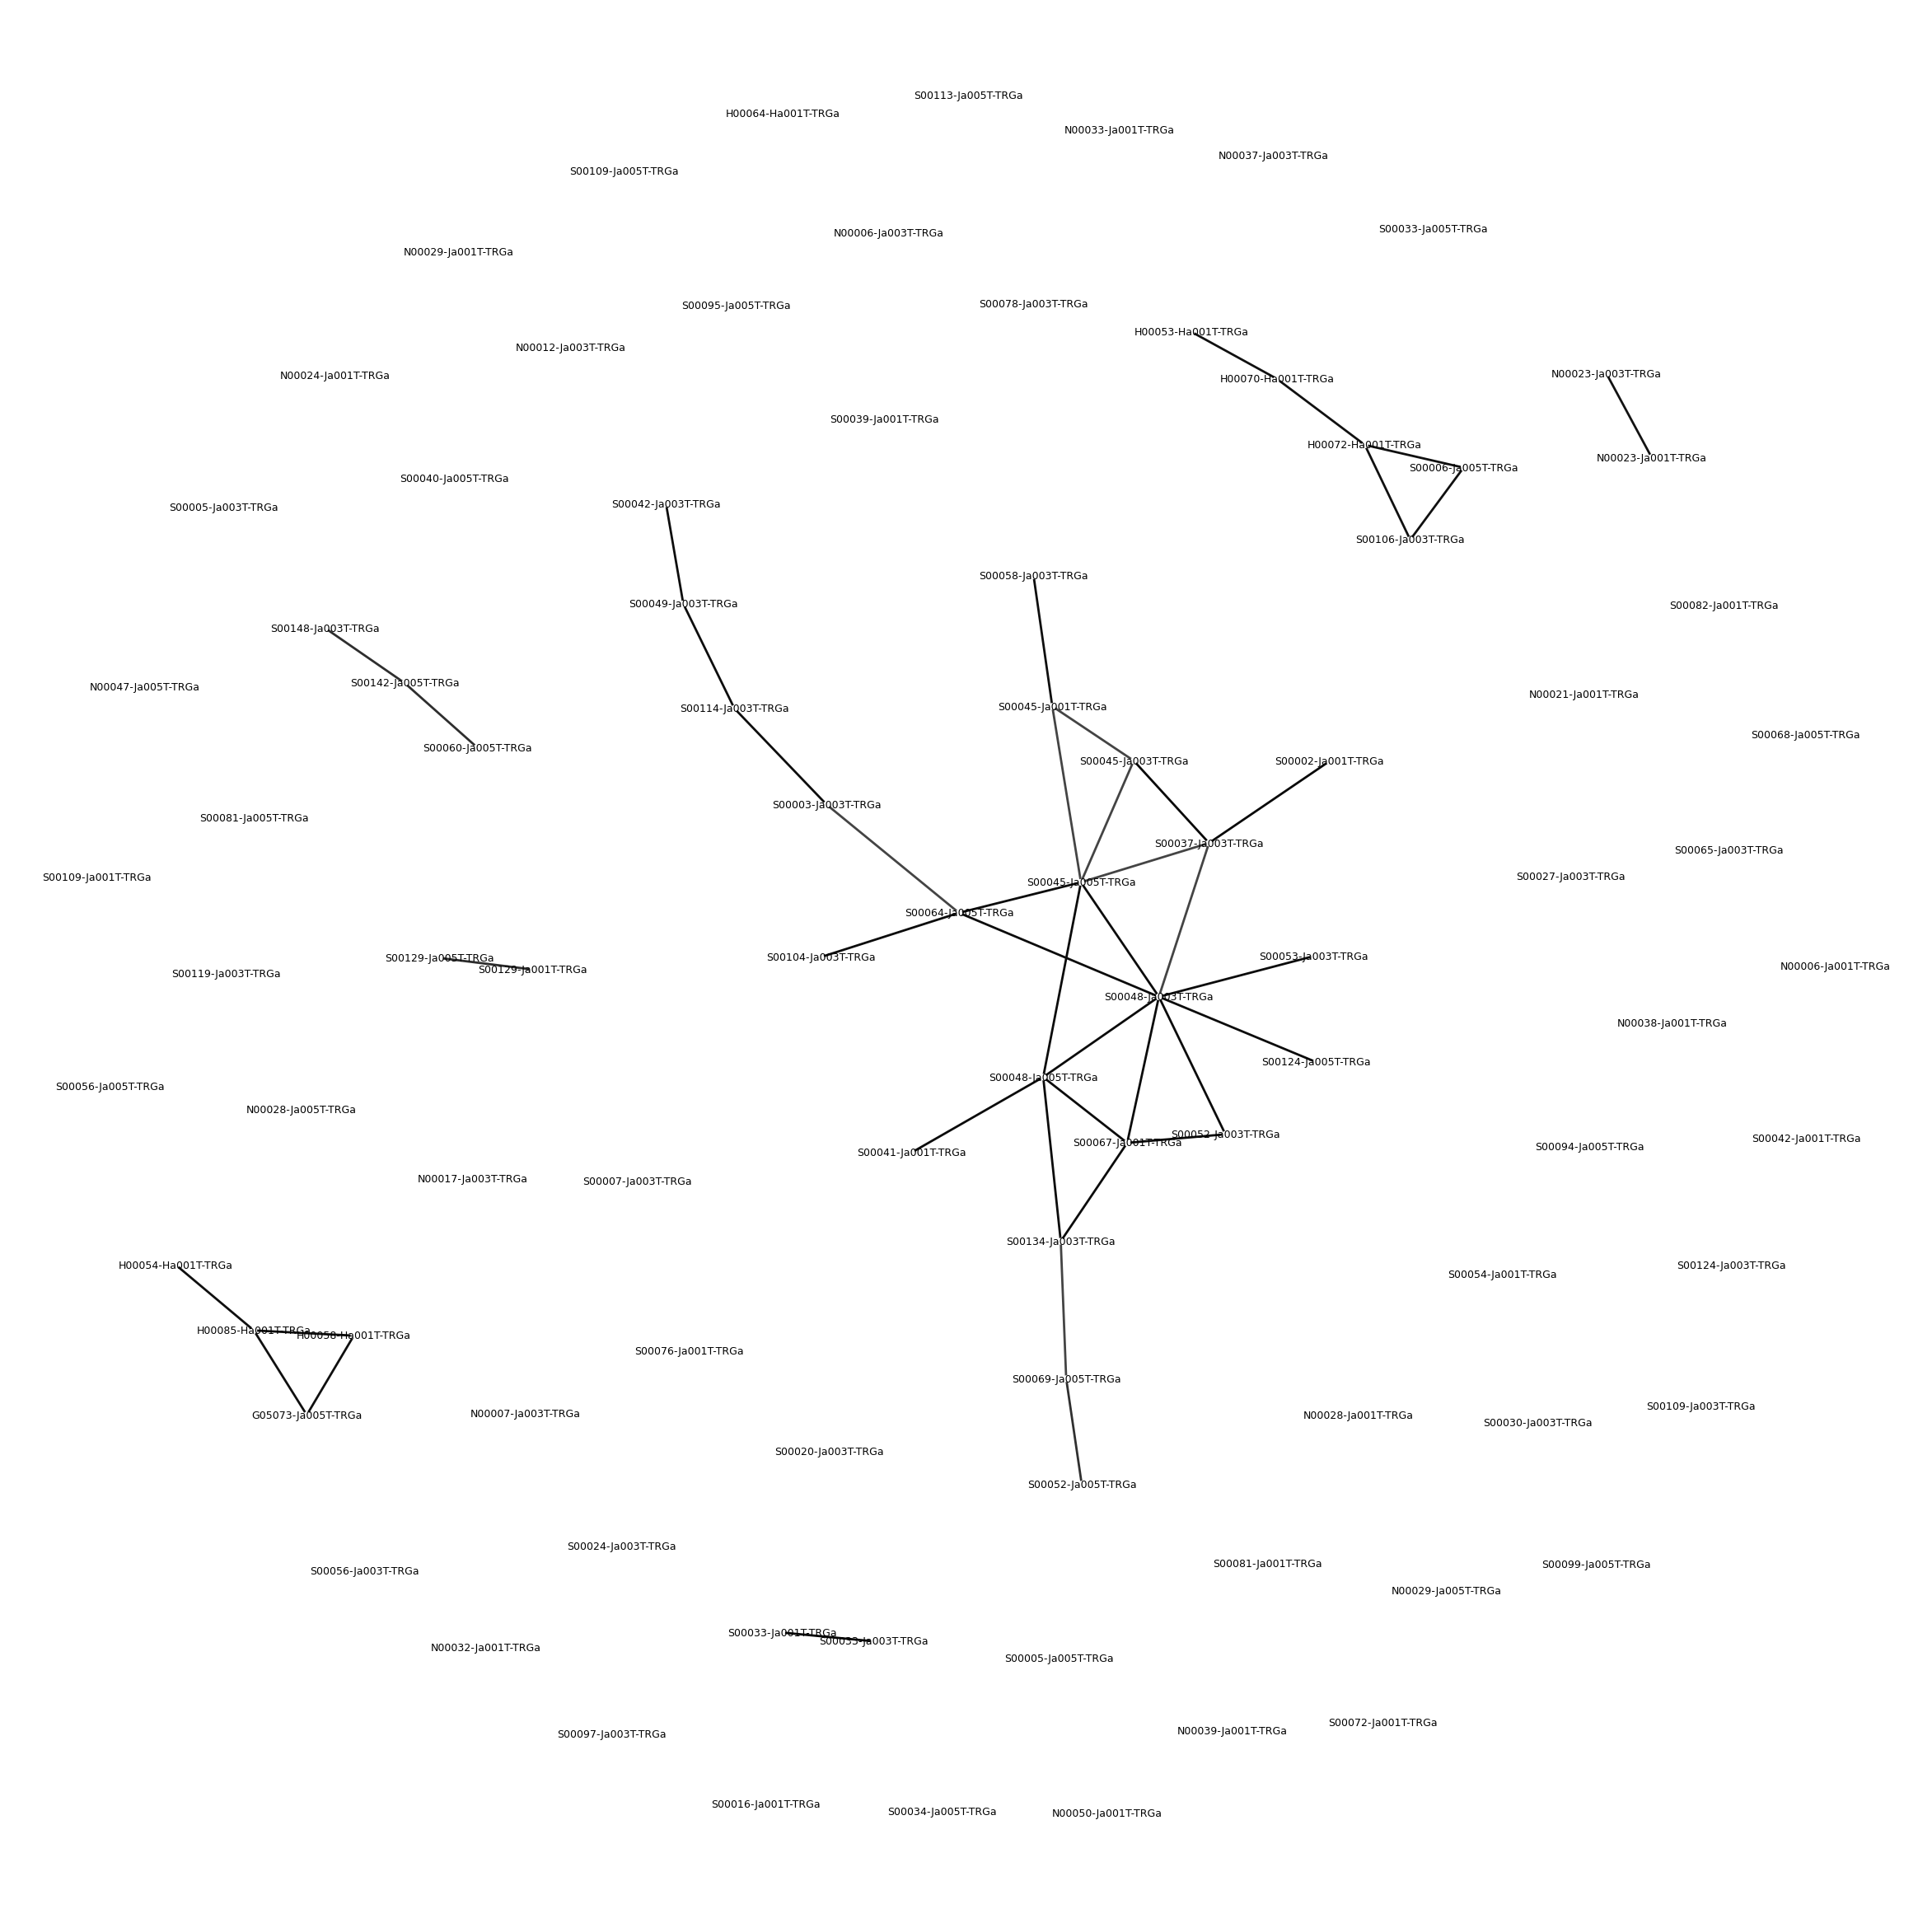

In [269]:
fig, ax = plt.subplots(figsize=(30,30))
ig.plot(
    g,
    target=ax,
    layout="auto", 
    vertex_size=0.03,
    vertex_frame_width=3.0,
    vertex_frame_color="white",
    vertex_label=g.vs["name"],
    vertex_label_size=9.0,
)

plt.show()

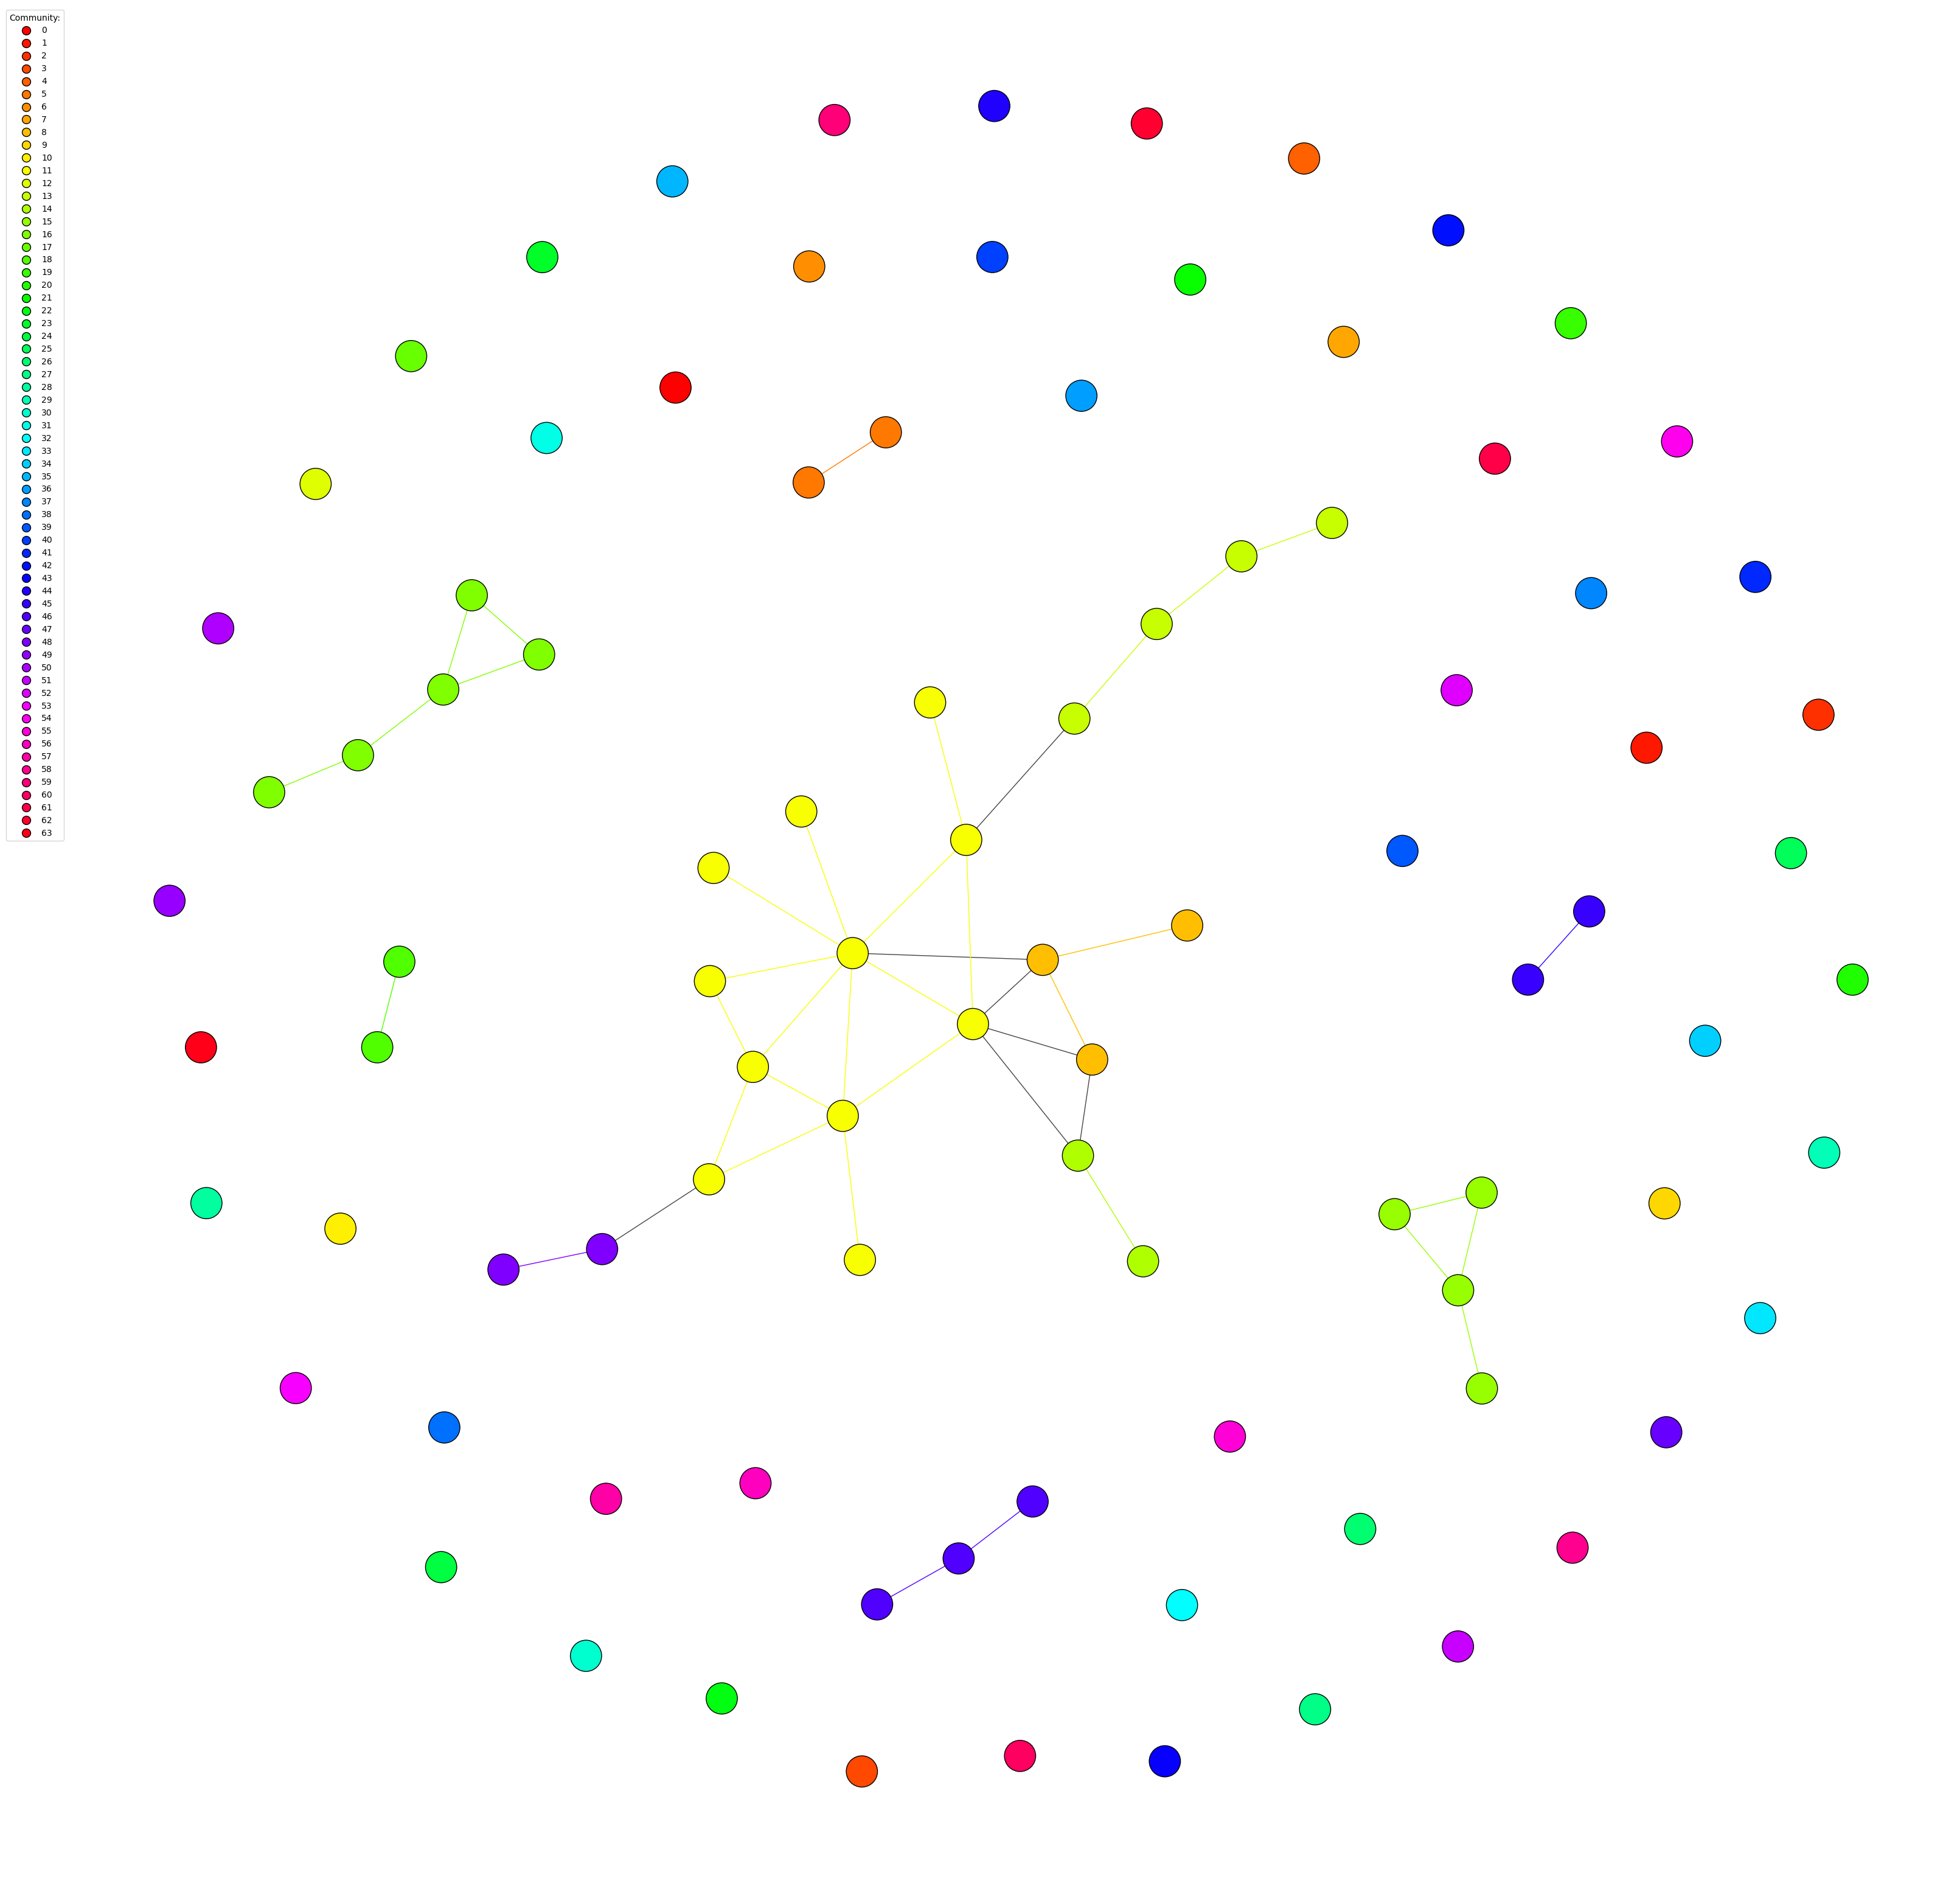

In [270]:
fig, ax = plt.subplots(figsize=(40,40))
ig.plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=0.3,
)

# Create a custom color legend
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)
plt.show()

In [271]:
# Original Graph
n_vertices = bulkRNA_graph_sum["cyan"]["num_vertices"]
edges = bulkRNA_graph_sum["cyan"]["10"]["edges"]

g = ig.Graph(n_vertices, edges)

g["title"] = "bulkRNA Network for cyan module and top 10 percent edges"
g.vs["name"] = list(df.columns)

# Communities
communities = g.community_edge_betweenness()
communities = communities.as_clustering()

num_communities = len(communities)
palette = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i

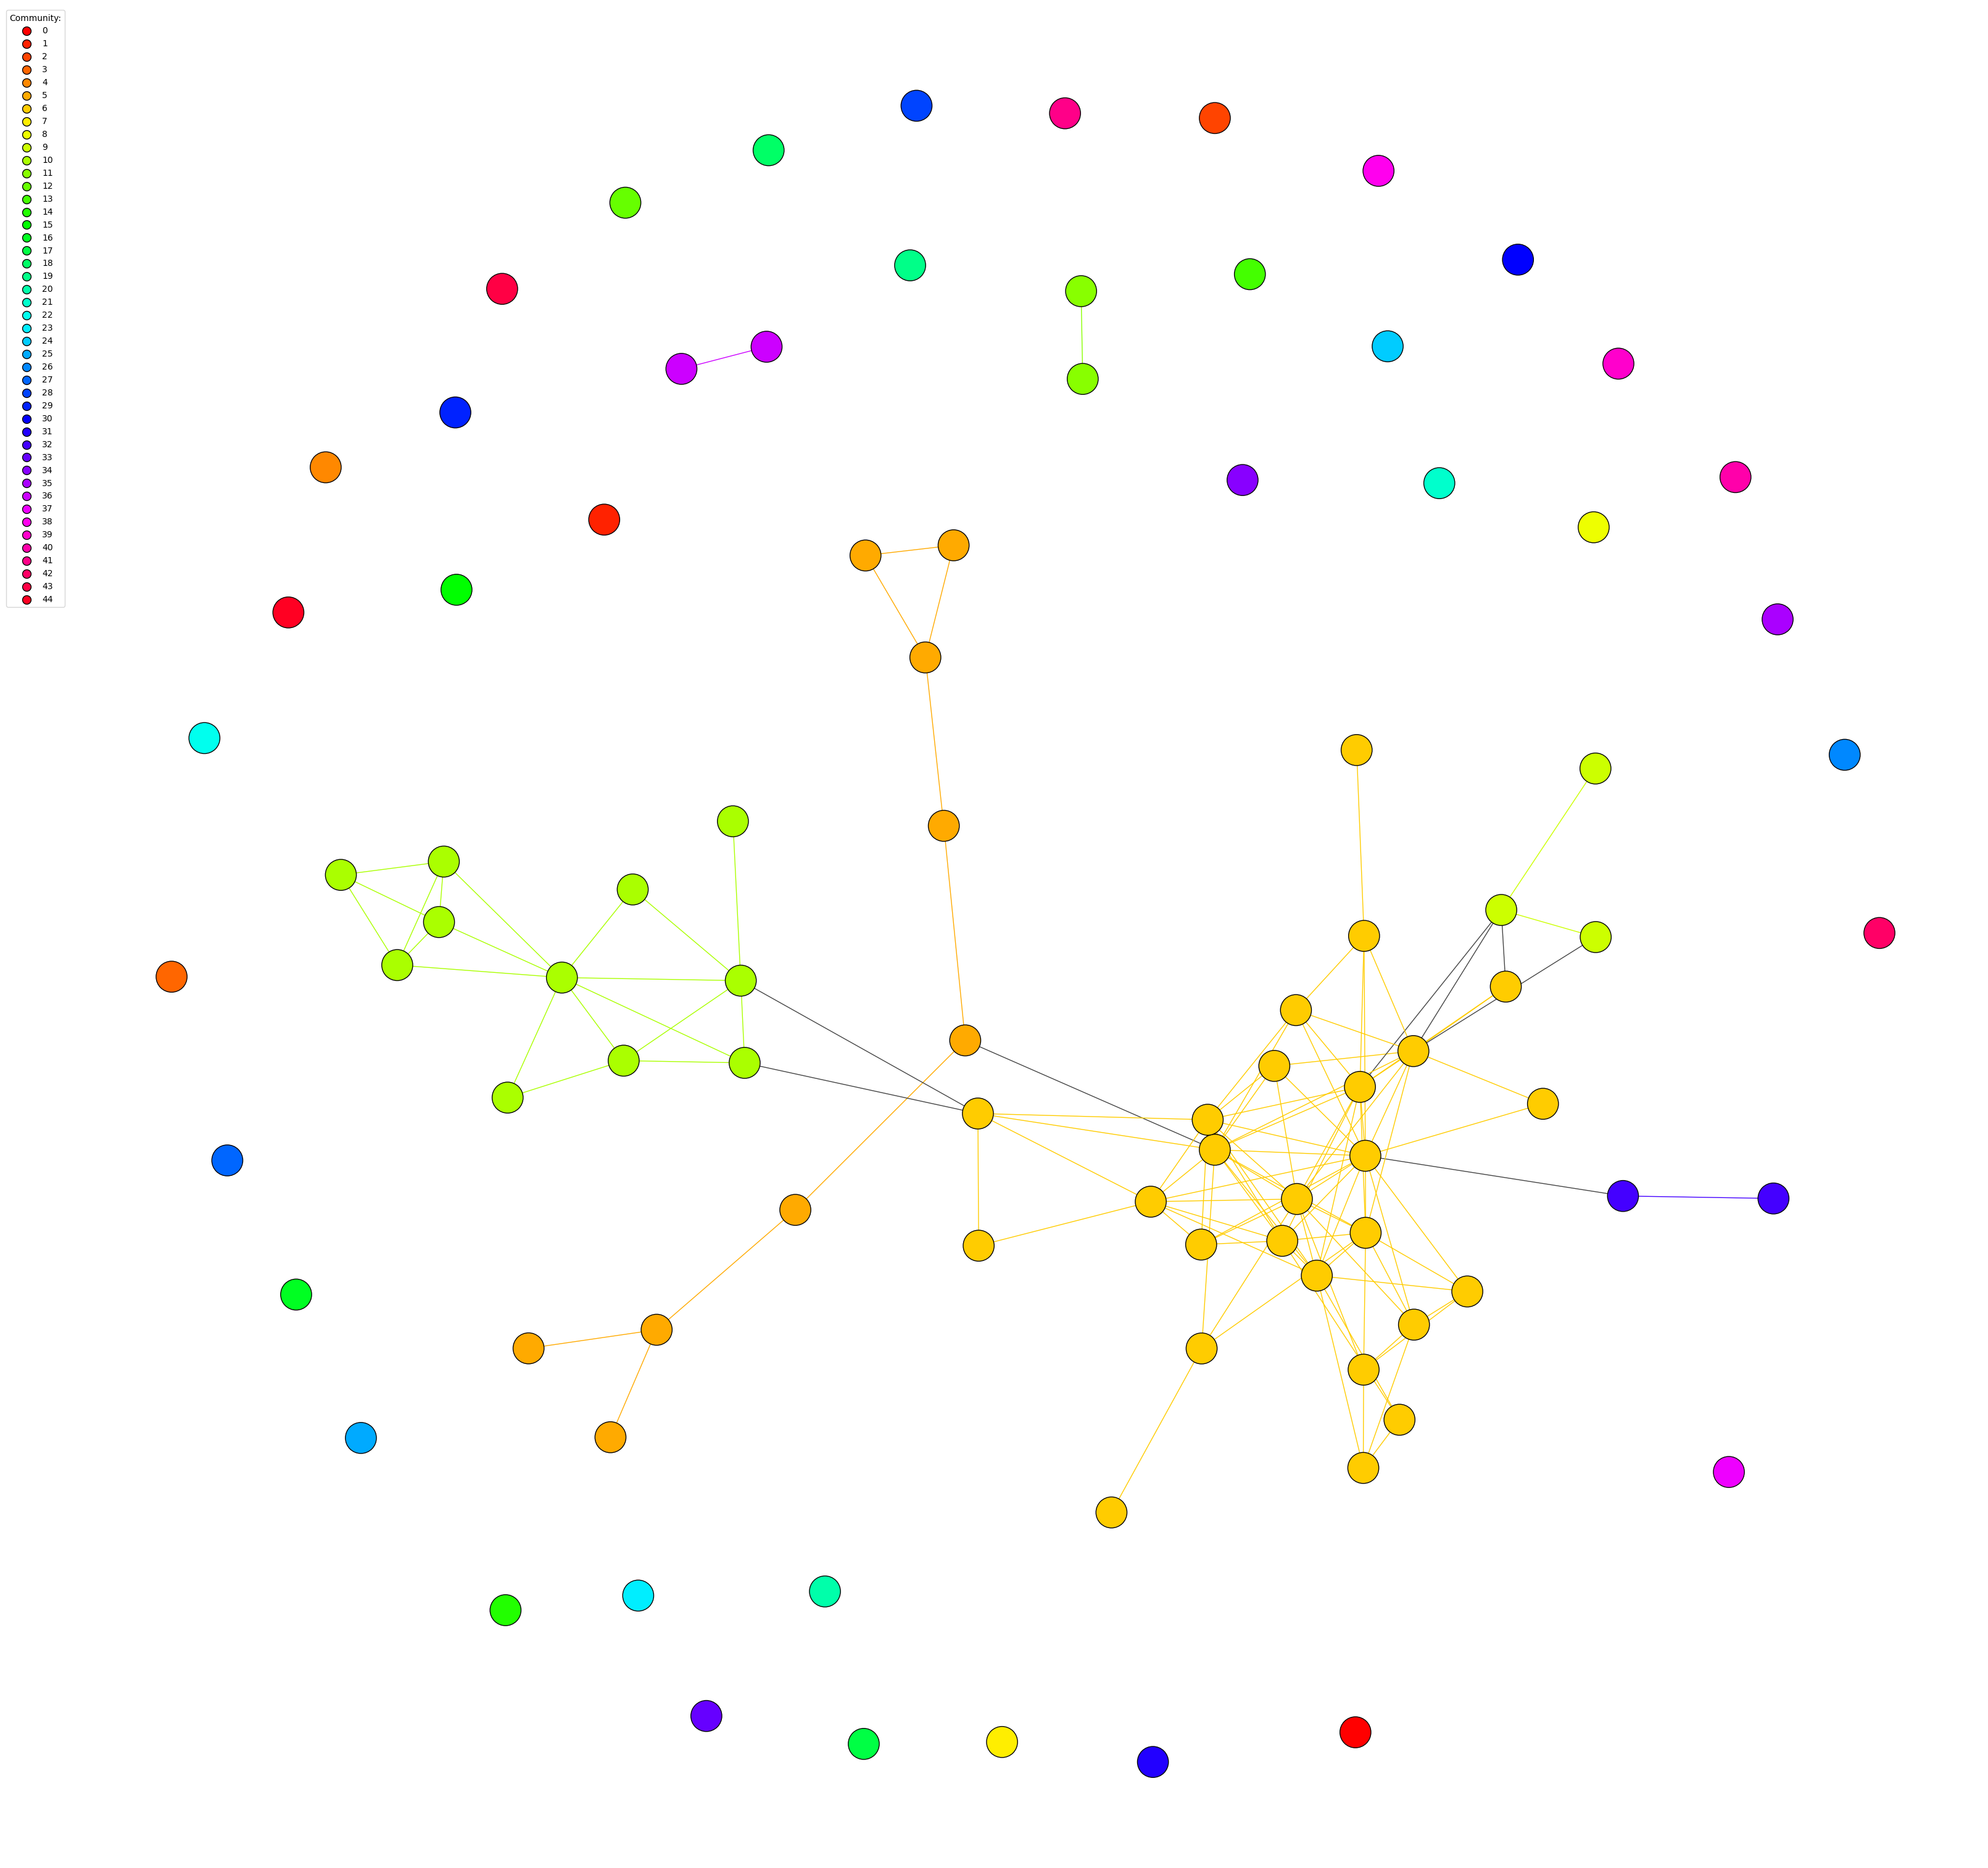

In [272]:
# Original Graph
n_vertices = bulkRNA_graph_sum["cyan"]["num_vertices"]
edges = bulkRNA_graph_sum["cyan"]["3"]["edges"]

g = ig.Graph(n_vertices, edges)

g["title"] = "bulkRNA Network for cyan module and top 3 percent edges"
g.vs["name"] = list(df.columns)

# Communities
communities = g.community_edge_betweenness()
communities = communities.as_clustering()

num_communities = len(communities)
palette = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i

fig, ax = plt.subplots(figsize=(40,40))
ig.plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=0.3,
)

# Create a custom color legend
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)
plt.show()

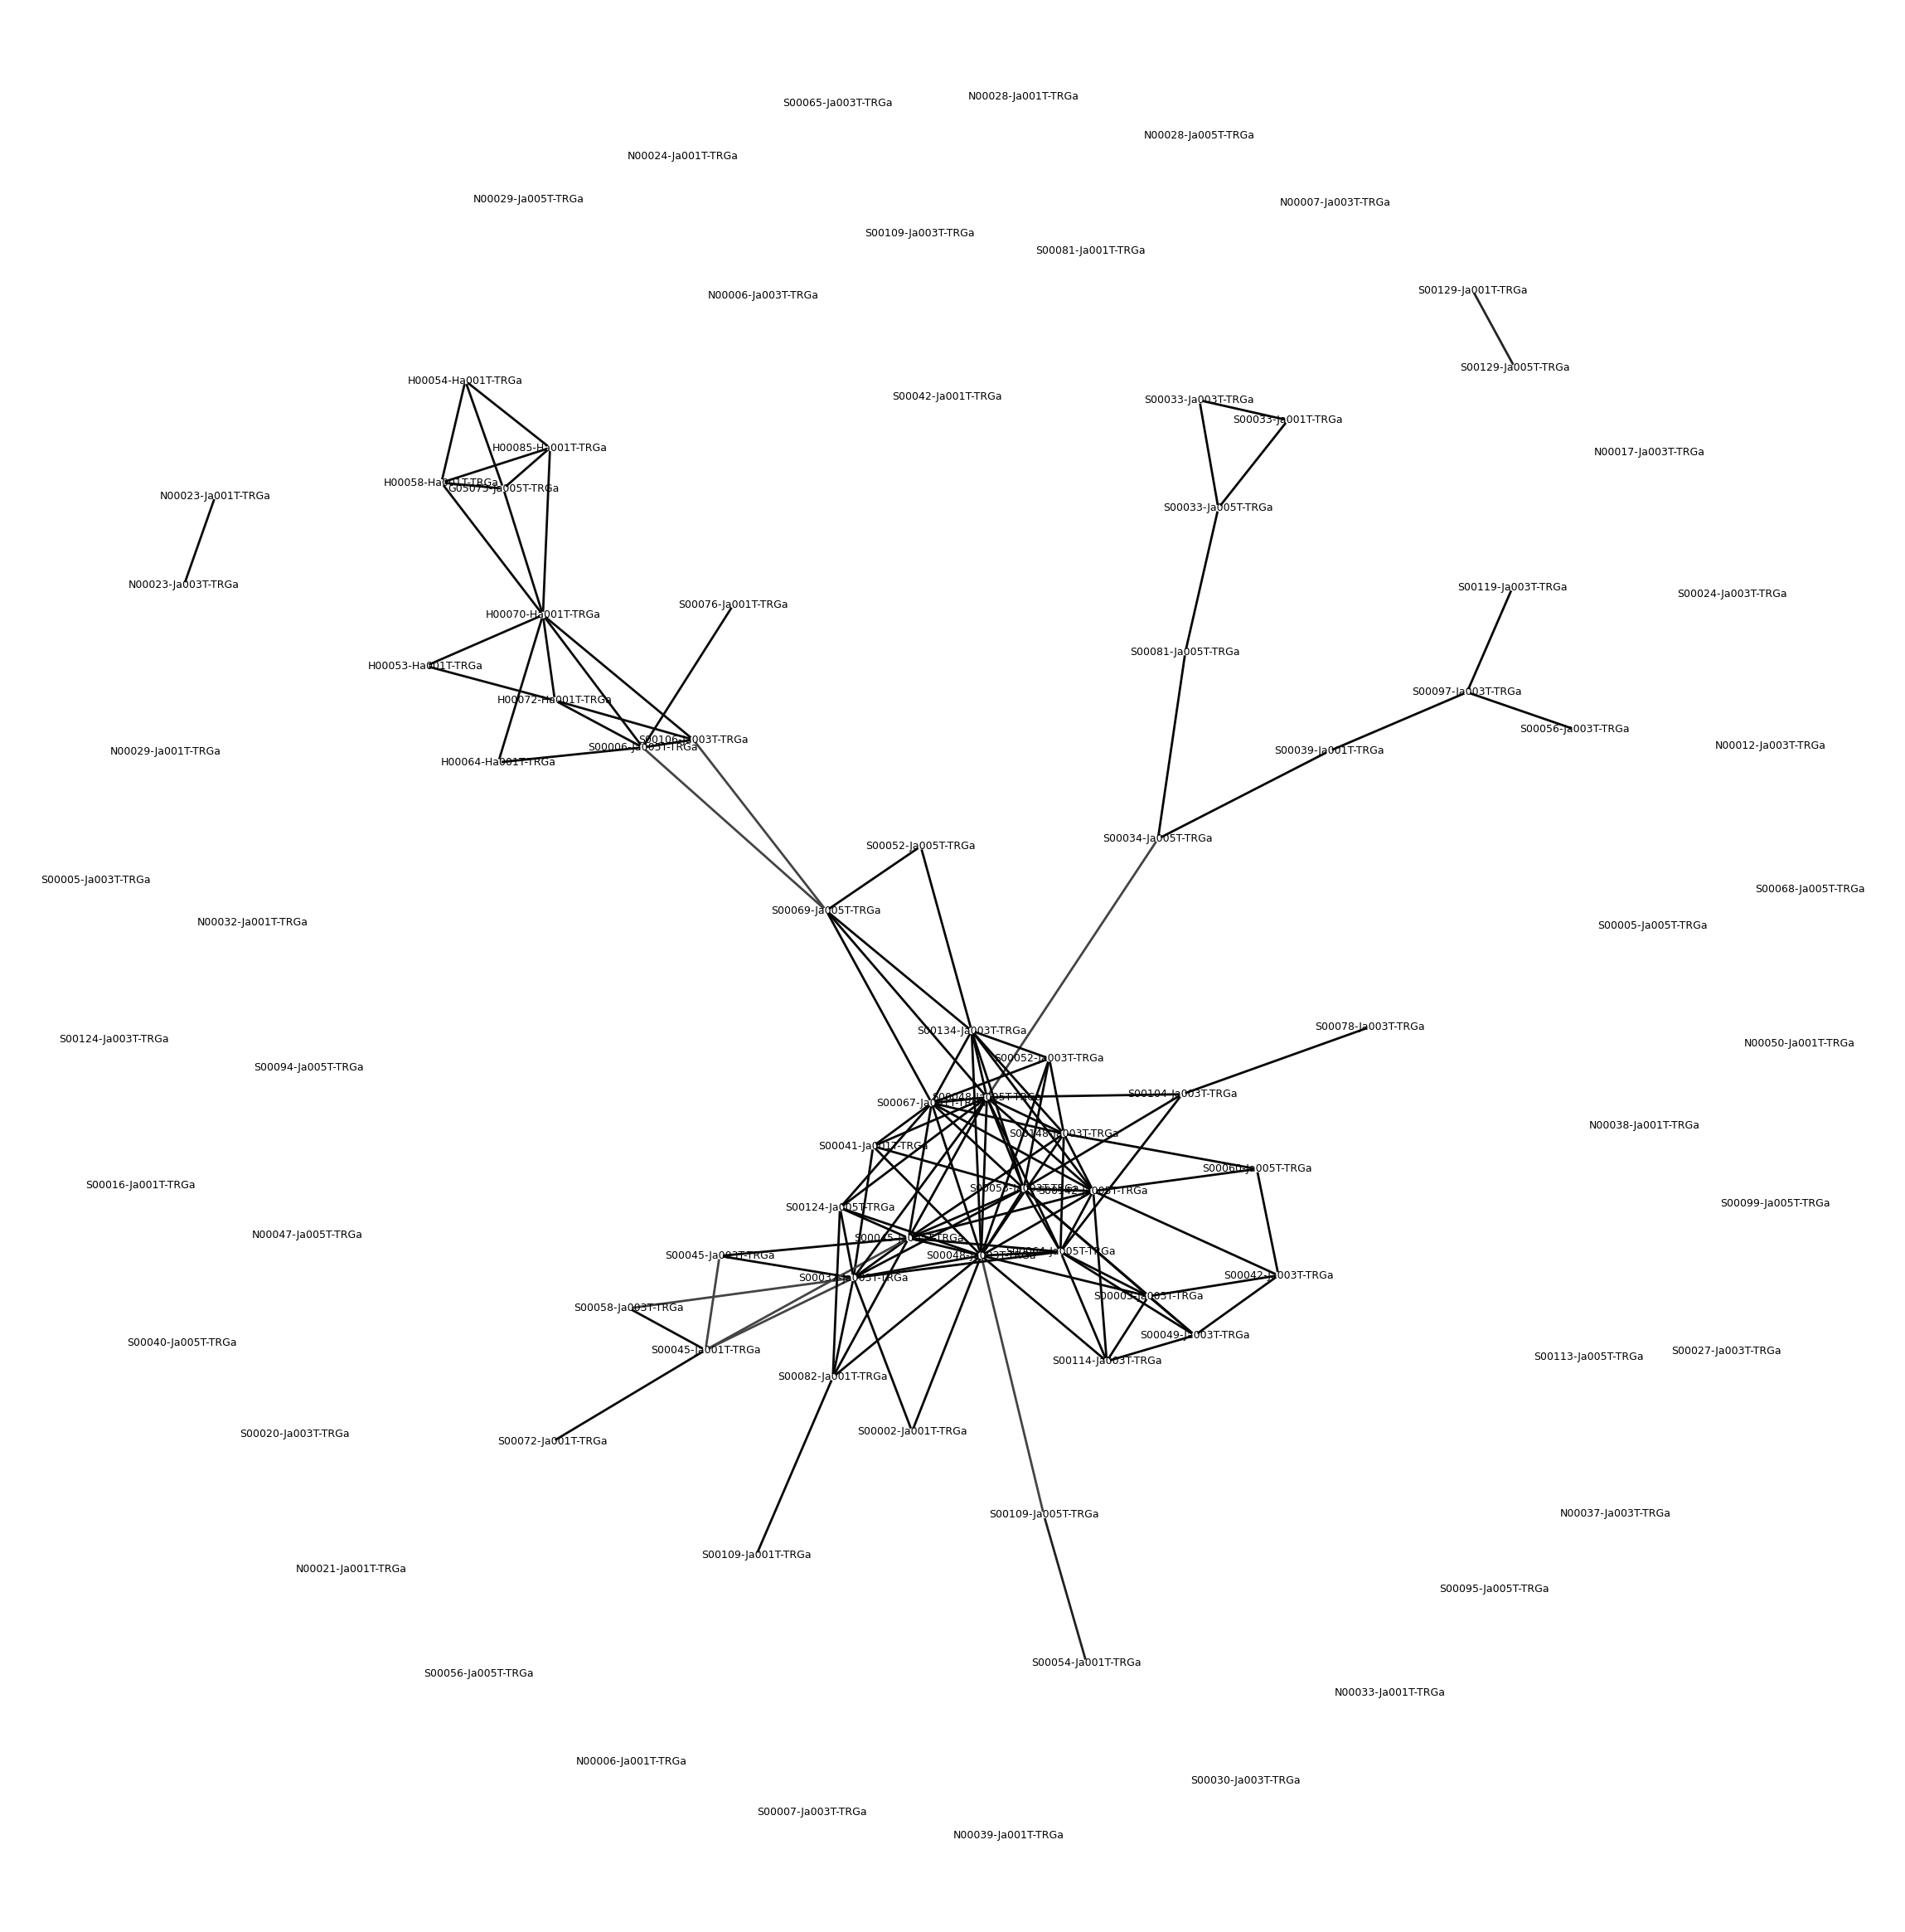

In [273]:
fig, ax = plt.subplots(figsize=(30,30))
ig.plot(
    g,
    target=ax,
    layout="auto", 
    vertex_size=0.03,
    vertex_frame_width=3.0,
    vertex_frame_color="white",
    vertex_label=g.vs["name"],
    vertex_label_size=9.0,
)

plt.show()

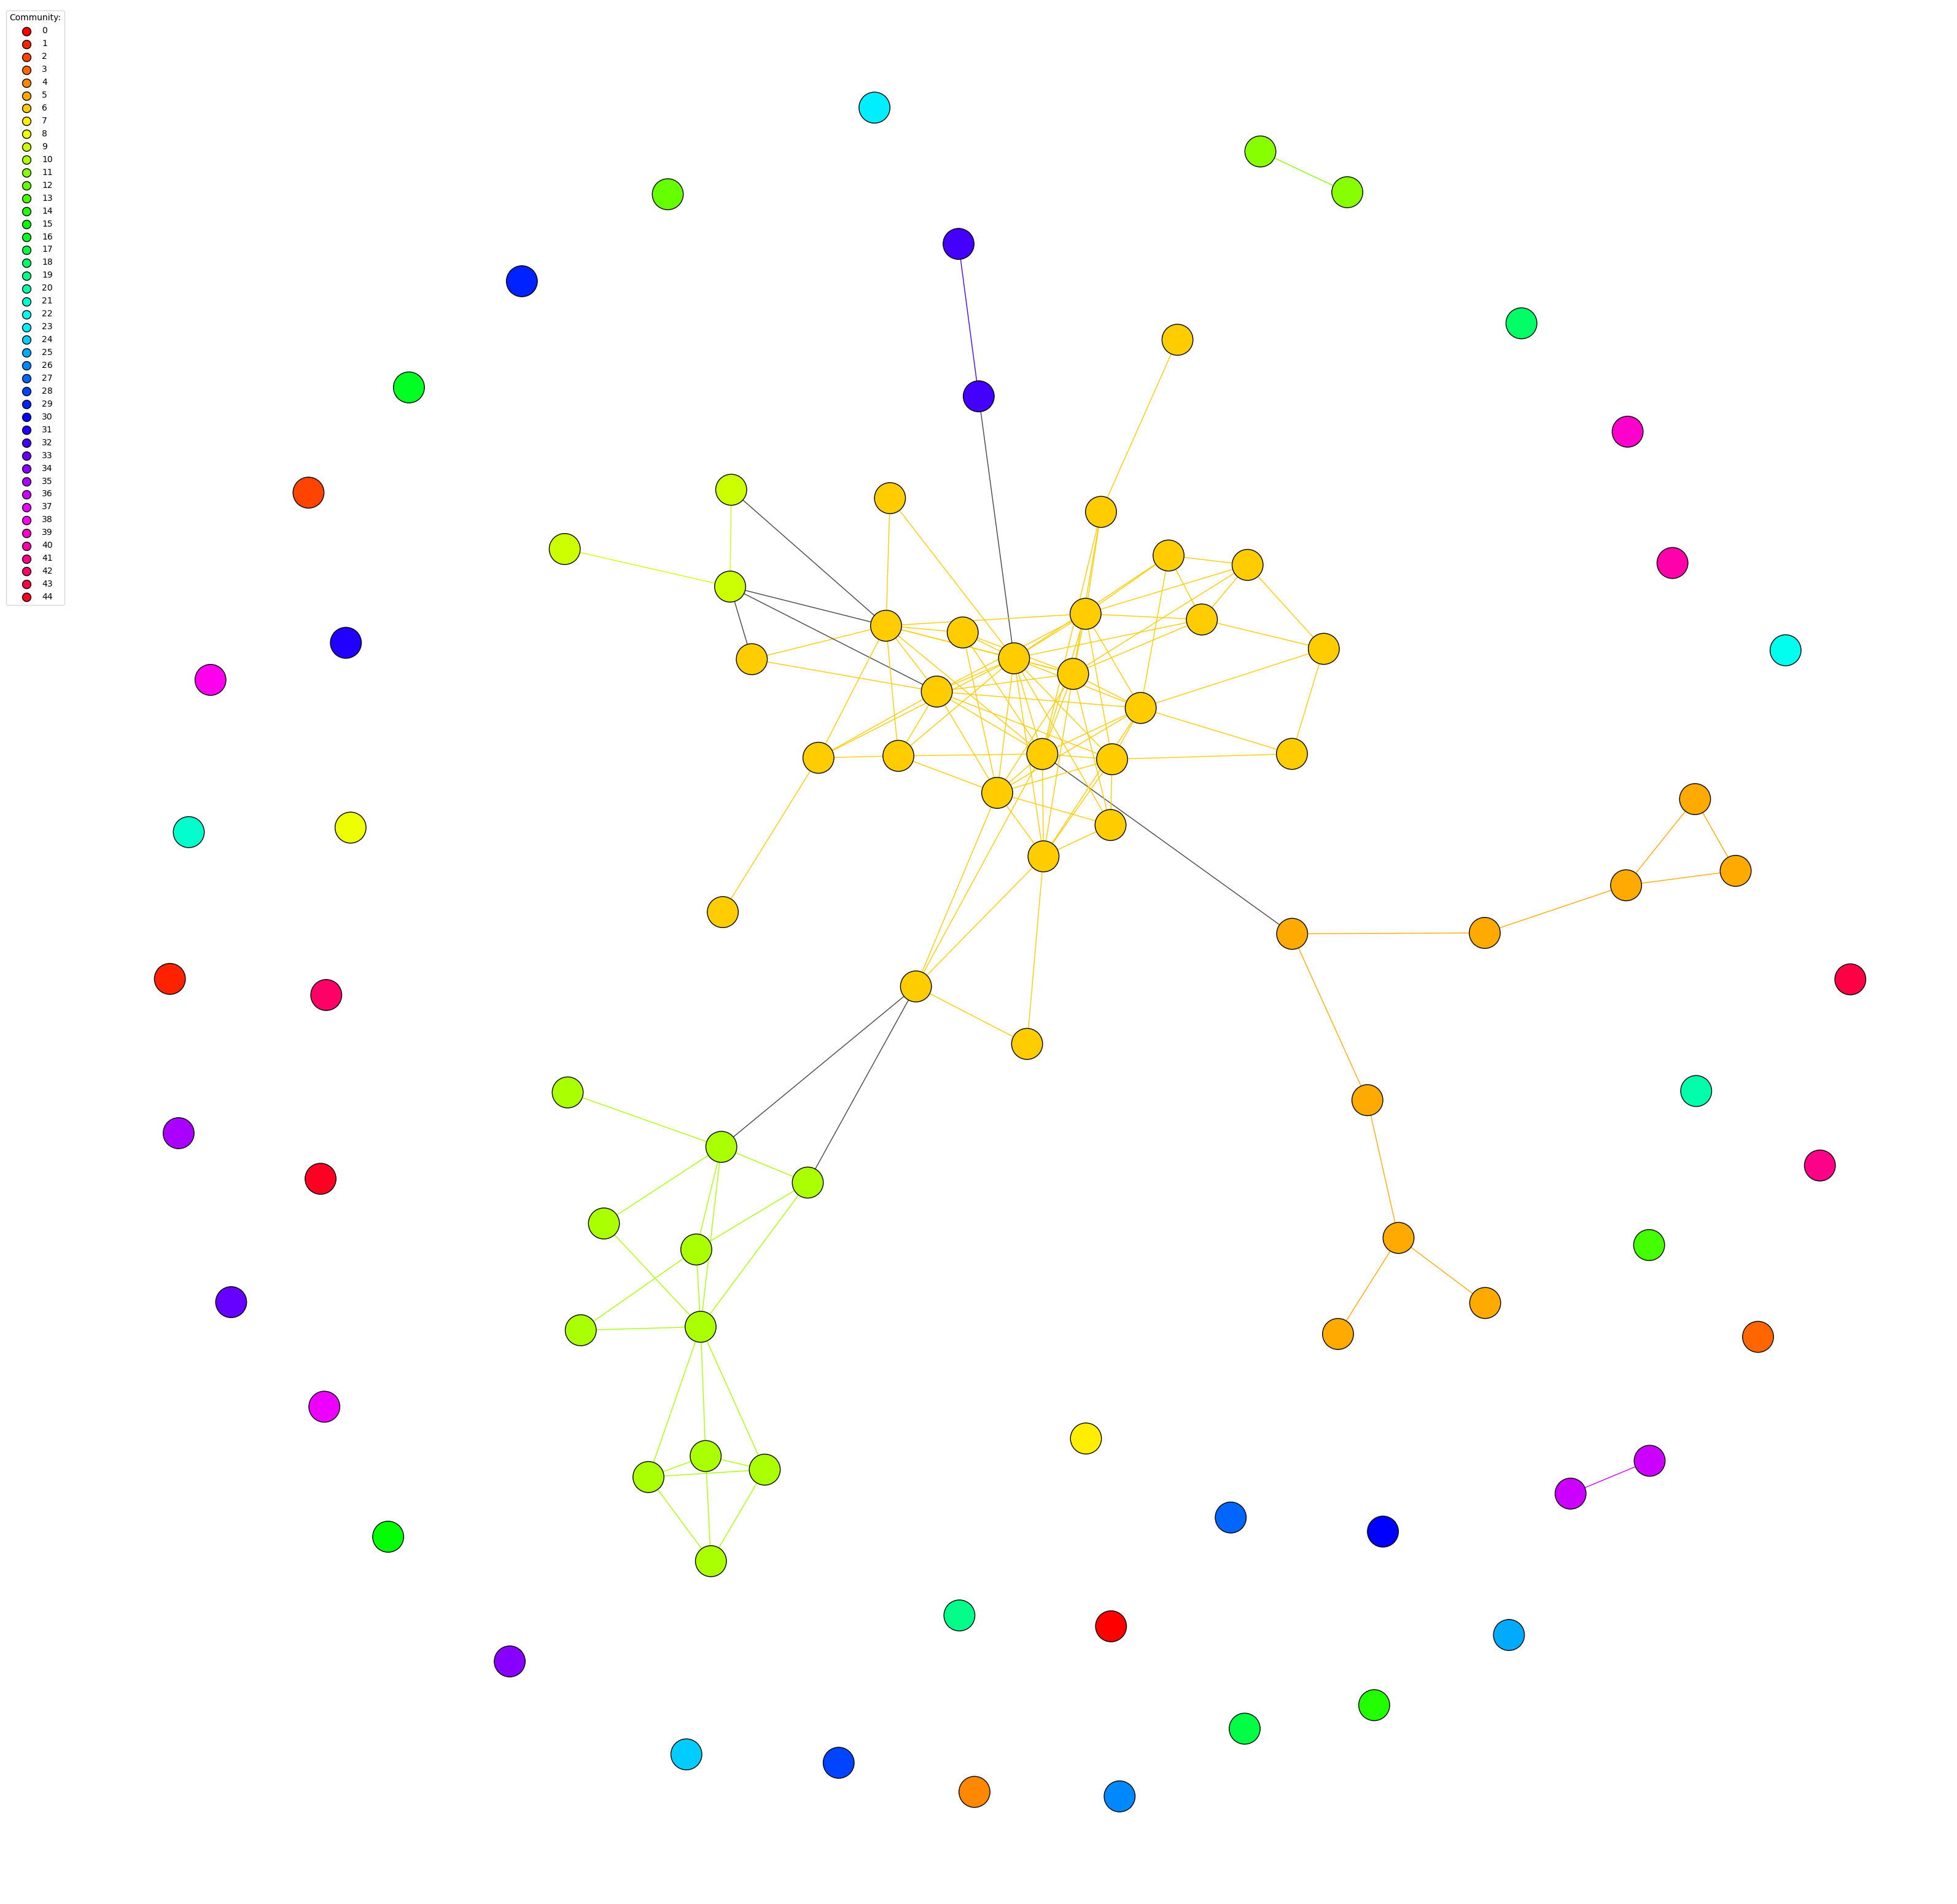

In [274]:
fig, ax = plt.subplots(figsize=(40,40))
ig.plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=0.3,
)

# Create a custom color legend
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)
plt.show()

### Luminex

In [275]:
luminex_graph_sum = {}
n_vertices = len(corr_p_luminex.index.unique())
luminex_graph_sum["num_vertices"] = n_vertices

In [276]:
corr = corr_p_luminex.to_numpy()
data = np.triu(corr) # Avoiding duplicates, since the matrix is symmetric
data = data[data>0] # Discard negative correlation 
data = data[data<1] # Discard correlation with self

In [277]:
percentile = np.percentile(data, 90) 
data_10 = data [data >= percentile] # Extract the top 10% percent correlation  
edges = [(i,j) for i in range(n_vertices) for j in range(i) if corr_p_luminex.iloc[i,j] >= percentile]
luminex_graph_sum["10"] = {"corr_data": data_10, "percentile_threshhold": percentile, "edges": edges}

percentile = np.percentile(data, 95) 
data_5 = data [data >= percentile] # Extract the top 10% percent correlation  
edges = [(i,j) for i in range(n_vertices) for j in range(i) if corr_p_luminex.iloc[i,j] >= percentile]
luminex_graph_sum["5"] = {"corr_data": data_5, "percentile_threshhold": percentile, "edges": edges}

percentile = np.percentile(data, 97) 
data_3 = data [data >= percentile] # Extract the top 10% percent correlation  
edges = [(i,j) for i in range(n_vertices) for j in range(i) if corr_p_luminex.iloc[i,j] >= percentile]
luminex_graph_sum["3"] = {"corr_data": data_3, "percentile_threshhold": percentile, "edges": edges}

percentile = np.percentile(data, 99) 
data_1 = data [data >= percentile] # Extract the top 10% percent correlation  
edges = [(i,j) for i in range(n_vertices) for j in range(i) if corr_p_luminex.iloc[i,j] >= percentile]
luminex_graph_sum["1"] = {"corr_data": data_1, "percentile_threshhold": percentile, "edges": edges}

edges = []
for i, row in enumerate(corr):
    non_one_row = row[row<1] # remove self correlation
    if len(non_one_row) > 0:
        percentile = np.percentile(non_one_row, 90) 
        for j, column in enumerate(row):
            if column < 1 and column > 0:
                if column >= percentile:
                    edges.append((i,j))
luminex_graph_sum["10 pn"] = {"edges": edges}

edges = []
for i, row in enumerate(corr):
    non_one_row = row[row<1] # remove self correlation
    if len(non_one_row) > 0:
        percentile = np.percentile(non_one_row, 95) 
        for j, column in enumerate(row):
            if column < 1 and column > 0:
                if column >= percentile:
                    edges.append((i,j))
luminex_graph_sum["5 pn"] = {"edges": edges}

#### Rescaling

In [278]:
data_scaled = minmax_scale.fit_transform(corr_p_luminex.to_numpy()).flatten()
luminex_graph_sum["corr_scaled"] = data_scaled

percentile = np.percentile(data_scaled, 90) 
luminex_graph_sum["10"]["percentile_threshhold_rescaled"] = percentile
data_rescaled = data_scaled [data_scaled >= percentile]
luminex_graph_sum["10"]["data_rescaled"] = data_rescaled

percentile = np.percentile(data_scaled, 95) 
luminex_graph_sum["5"]["percentile_threshhold_rescaled"] = percentile
data_rescaled = data_scaled [data_scaled >= percentile]
luminex_graph_sum["5"]["data_rescaled"] = data_rescaled

percentile = np.percentile(data_scaled, 97) 
luminex_graph_sum["3"]["percentile_threshhold_rescaled"] = percentile
data_rescaled = data_scaled [data_scaled >= percentile]
luminex_graph_sum["3"]["data_rescaled"] = data_rescaled

percentile = np.percentile(data_scaled, 99) 
luminex_graph_sum["1"]["percentile_threshhold_rescaled"] = percentile
data_rescaled = data_scaled [data_scaled >= percentile]
luminex_graph_sum["1"]["data_rescaled"] = data_rescaled

## Graph Analysis

In [279]:
stats = ["num_edges", "max_degree", "min_degree", "min_degree_non_zero", "mean_degree", "mean_degree_non_zero", "average_path_length", "largest_clique_size", "density", "diameter", "num_isolated_nodes", "num_communities", "percentile_threshhold", "percentile_threshhold_rescaled" ] # Satistics to extract

### FACS

In [280]:
for key in facs_graph_sum.keys():
    if key == "num_vertices":
        num_v = facs_graph_sum["num_vertices"]
    elif not key == "corr_scaled":
        edges = facs_graph_sum[key]["edges"]
        g = ig.Graph(num_v, edges)
        g["title"] = "FACS Network for Top " + key + " Edges"
        g.vs["name"] = list(corr_p_facs.columns)
        g.vs["disease"] =  [facs.obs.Diseases[facs.obs_names == name][0] for name in g.vs["name"] ]
        g.vs["gender"] =  [facs.uns["experiment_info"][facs.uns["experiment_info"]["scRNASeq_sample_ID"] == name]["Sex"][0] for name in g.vs["name"] ]
        g.vs["age"] = [facs.uns["experiment_info"][facs.uns["experiment_info"]["scRNASeq_sample_ID"] == name]["Age"][0] for name in g.vs["name"] ]
        g.vs["disease"] =  [patient_disease_map[name] for name in g.vs["name"] ]
        g.vs["disease_group"] =  [patient_disease_map_reduced[name] for name in g.vs["name"] ]

        # Communities
        communities = g.community_edge_betweenness(directed = False)
        communities = communities.as_clustering()

        num_communities = len(communities)
        palette = ig.RainbowPalette(n=num_communities)
        for i, community in enumerate(communities):
            g.vs[community]["community_color"] = i
            community_edges = g.es.select(_within=community)
            community_edges["color"] = i

        # Degrees
        d = np.array(g.degree())
        d_non_zero = d[d>0]
        d_zeros = d[d == 0]
        
        facs_graph_sum[key]["graph"] = g 
        facs_graph_sum[key]["num_edges"] = len(edges)
        facs_graph_sum[key]["max_degree"] =  d.max()
        facs_graph_sum[key]["min_degree"] =  d.min()
        #facs_graph_sum[key]["min_degree_non_zero"] =  d_non_zero.min()
        facs_graph_sum[key]["mean_degree"] =  d.mean()
        #facs_graph_sum[key]["mean_degree_non_zero"] = d_non_zero.mean()
        facs_graph_sum[key]["average_path_length"] = g.average_path_length(directed=False)
        facs_graph_sum[key]["largest_clique_size"]  = g.clique_number()
        facs_graph_sum[key]["density"]  = g.density()
        facs_graph_sum[key]["diameter"]  = g.diameter(directed=False)
        facs_graph_sum[key]["num_isolated_nodes"] = len(d_zeros)
        facs_graph_sum[key]["num_communities"] = num_communities
        facs_graph_sum[key]["communities"] = communities
        facs_graph_sum[key]["community_palette"] = palette
        facs_graph_sum[key]["community_edges"] = community_edges
        facs_graph_sum[key]["laplacian"] = np.array(g.laplacian())

        g.write_pickle(fname= os.path.join(graph, "facs_" + key +"_g"))
        
        if key == "5":
            id_to_graph_5[name_to_id["facs"]] = g
            id_to_num_com_corr_5[name_to_id["facs"]] = len(palette)
            
        if key == "10":
            id_to_graph_10[name_to_id["facs"]] = g
            id_to_num_com_corr_10[name_to_id["facs"]] = len(palette)

        if key == "10 pn":
            id_to_graph_per_node_10[name_to_id["facs"]] = g
            id_to_num_com_corr_per_node_10[name_to_id["facs"]] = len(palette)
        
        if key == "5 pn":
            id_to_graph_per_node_5[name_to_id["facs"]] = g
            id_to_num_com_corr_per_node_5[name_to_id["facs"]] = len(palette)

In [281]:
stats_10 = [facs_graph_sum["10"][key] for key in stats]
stats_5 = [facs_graph_sum["5"][key] for key in stats]
stats_3 = [facs_graph_sum["3"][key] for key in stats]
stats_1 = [facs_graph_sum["1"][key] for key in stats]

items =list(zip(stats,stats_10,stats_5,stats_3, stats_1))
summary = {list(item)[0]:list(item)[1:] for item in items}
summary["num_vertices"] = [facs_graph_sum["num_vertices"]] * 4
summary["percentile"] = [10,5,3,1]
facs_df = pd.DataFrame(summary).set_index("percentile")

KeyError: 'min_degree_non_zero'

### CyTOF

In [ ]:
for ct in cytof_graph_sum.keys():
    for key in cytof_graph_sum[ct]:
        if key == "num_vertices":
            num_v = cytof_graph_sum[ct]["num_vertices"]
        elif not key == "corr_scaled":
            edges = cytof_graph_sum[ct][key]["edges"]
            g = ig.Graph(num_v, edges)
            g["title"] = "CyTOF Network for Top " + key + " Edges and " + ct + " Cell Type"
            g.vs["name"] = list(corr_p_cytof[ct].columns)
            g.vs["disease"] =  [cytof.obs.Diseases[cytof.obs_names == name][0] for name in g.vs["name"] ]
            g.vs["gender"] =  [cytof.uns["experiment_info"][cytof.uns["experiment_info"]["patient_id"] == name]["Sex"][0] for name in g.vs["name"] ]
            g.vs["age"] = [cytof.uns["experiment_info"][cytof.uns["experiment_info"]["patient_id"] == name]["Age"][0] for name in g.vs["name"] ]
            g.vs["disease"] =  [patient_disease_map[name] for name in g.vs["name"] ]
            g.vs["disease_group"] =  [patient_disease_map_reduced[name] for name in g.vs["name"] ]

            # Communities
            communities = g.community_edge_betweenness(directed = False)
            communities = communities.as_clustering()

            num_communities = len(communities)
            palette = ig.RainbowPalette(n=num_communities)
            for i, community in enumerate(communities):
                g.vs[community]["community_color"] = i
                community_edges = g.es.select(_within=community)
                community_edges["color"] = i

            # Degrees
            d = np.array(g.degree())
            d_non_zero = d[d>0]
            d_zeros = d[d == 0]
            
            cytof_graph_sum[ct][key]["graph"] = g 
            cytof_graph_sum[ct][key]["num_edges"] = len(edges)
            cytof_graph_sum[ct][key]["max_degree"] =  d.max()
            cytof_graph_sum[ct][key]["min_degree"] =  d.min()
            #cytof_graph_sum[ct][key]["min_degree_non_zero"] =  d_non_zero.min()
            cytof_graph_sum[ct][key]["mean_degree"] =  d.mean()
            #cytof_graph_sum[ct][key]["mean_degree_non_zero"] = d_non_zero.mean()
            cytof_graph_sum[ct][key]["average_path_length"] = g.average_path_length(directed=False)
            cytof_graph_sum[ct][key]["largest_clique_size"]  = g.clique_number()
            cytof_graph_sum[ct][key]["density"]  = g.density()
            cytof_graph_sum[ct][key]["diameter"]  = g.diameter(directed=False)
            cytof_graph_sum[ct][key]["num_isolated_nodes"] = len(d_zeros)
            cytof_graph_sum[ct][key]["num_communities"] = num_communities
            cytof_graph_sum[ct][key]["communities"] = communities
            cytof_graph_sum[ct][key]["community_palette"] = palette
            cytof_graph_sum[ct][key]["community_edges"] = community_edges
            cytof_graph_sum[ct][key]["laplacian"] = np.array(g.laplacian())

            g.write_pickle(fname= os.path.join(graph, "cytof_"+ ct + "_" + key +"_g"))

        if key == "5":
            id_to_graph_5[name_to_id["cytof_" + ct]] = g
            id_to_num_com_corr_5[name_to_id["cytof_" + ct]] = len(palette)
        if key == "10":
            id_to_graph_10[name_to_id["cytof_" + ct]] = g
            id_to_num_com_corr_10[name_to_id["cytof_" + ct]] = len(palette)
        if key == "10 pn":
            id_to_graph_per_node_10[name_to_id["cytof_" + ct]] = g
            id_to_num_com_corr_per_node_10[name_to_id["cytof_" + ct]] = len(palette)
        if key == "5 pn":
            id_to_graph_per_node_5[name_to_id["cytof_" + ct]] = g
            id_to_num_com_corr_per_node_5[name_to_id["cytof_" + ct]] = len(palette)

In [ ]:
cts = list(cytof_graph_sum.keys()) * 4
percentiles = np.array([["10"] * len(cytof_graph_sum.keys()), ["5"] * len(cytof_graph_sum.keys()), ["3"] * len(cytof_graph_sum.keys()), ["1"] * len(cytof_graph_sum.keys())]).flatten()
summary = {key:[0]* len(cts) for key in stats}
summary["cell types"] = cts
summary["percentile"] = percentiles
summary["num_vertices"] = [0] * len(cts)

for i, ct in enumerate(cts):
    summary["num_vertices"][i] = cytof_graph_sum[ct]["num_vertices"]
    for stat in stats:
        summary[stat][i] = cytof_graph_sum[ct][percentiles[i]][stat]

cytof_df = pd.DataFrame(summary)

KeyError: 'min_degree_non_zero'

### ADT

In [ ]:
for ct in adt_graph_sum.keys():
    for key in adt_graph_sum[ct]:
        if key == "num_vertices":
            num_v = adt_graph_sum[ct]["num_vertices"]
        elif not key == "corr_scaled":
            edges = adt_graph_sum[ct][key]["edges"]
            g = ig.Graph(num_v, edges)
            g["title"] = "ADT Network for Top " + key + " Edges and " + ct + " Cell Type"
            g.vs["name"] = list(corr_p_adt[ct].columns)
            g.vs["disease"] =  [adt.obs.Diseases[adt.obs_names == name][0] for name in g.vs["name"] ]
            g.vs["gender"] =  [adt.obs.Sex[adt.obs_names == name][0] for name in g.vs["name"] ]
            g.vs["age"] = [adt.obs.Age[adt.obs_names == name][0] for name in g.vs["name"] ]
            g.vs["disease"] =  [patient_disease_map[name] for name in g.vs["name"] ]
            g.vs["disease_group"] =  [patient_disease_map_reduced[name] for name in g.vs["name"] ]

            # Communities
            communities = g.community_edge_betweenness(directed = False)
            communities = communities.as_clustering()

            num_communities = len(communities)
            palette = ig.RainbowPalette(n=num_communities)
            for i, community in enumerate(communities):
                g.vs[community]["community_color"] = i
                community_edges = g.es.select(_within=community)
                community_edges["color"] = i

            # Degrees
            d = np.array(g.degree())
            d_non_zero = d[d>0]
            d_zeros = d[d == 0]
            
            adt_graph_sum[ct][key]["graph"] = g 
            adt_graph_sum[ct][key]["num_edges"] = len(edges)
            adt_graph_sum[ct][key]["max_degree"] =  d.max()
            adt_graph_sum[ct][key]["min_degree"] =  d.min()
            #adt_graph_sum[ct][key]["min_degree_non_zero"] =  d_non_zero.min()
            adt_graph_sum[ct][key]["mean_degree"] =  d.mean()
            #adt_graph_sum[ct][key]["mean_degree_non_zero"] = d_non_zero.mean()
            adt_graph_sum[ct][key]["average_path_length"] = g.average_path_length(directed=False)
            adt_graph_sum[ct][key]["largest_clique_size"]  = g.clique_number()
            adt_graph_sum[ct][key]["density"]  = g.density()
            adt_graph_sum[ct][key]["diameter"]  = g.diameter(directed=False)
            adt_graph_sum[ct][key]["num_isolated_nodes"] = len(d_zeros)
            adt_graph_sum[ct][key]["num_communities"] = num_communities
            adt_graph_sum[ct][key]["communities"] = communities
            adt_graph_sum[ct][key]["community_palette"] = palette
            adt_graph_sum[ct][key]["community_edges"] = community_edges
            adt_graph_sum[ct][key]["laplacian"] = np.array(g.laplacian())

            g.write_pickle(fname= os.path.join(graph, "adt"+ ct + "_" + key +"_g"))

        if key == "5":
            id_to_graph_5[name_to_id["adt_" + ct]] = g
            id_to_num_com_corr_5[name_to_id["adt_" + ct]] = len(palette)
        if key == "10":
            id_to_graph_10[name_to_id["adt_" + ct]] = g
            id_to_num_com_corr_10[name_to_id["adt_" + ct]] = len(palette)
        if key == "10 pn":
            id_to_graph_per_node_10[name_to_id["adt_" + ct]] = g
            id_to_num_com_corr_per_node_10[name_to_id["adt_" + ct]] = len(palette)
        if key == "5 pn":
            id_to_graph_per_node_5[name_to_id["adt_" + ct]] = g
            id_to_num_com_corr_per_node_5[name_to_id["adt_" + ct]] = len(palette)

In [ ]:
cts = list(adt_graph_sum.keys()) * 4
percentiles = np.array([["10"] * len(adt_graph_sum.keys()), ["5"] * len(adt_graph_sum.keys()), ["3"] * len(adt_graph_sum.keys()), ["1"] * len(adt_graph_sum.keys())]).flatten()
summary = {key:[0]* len(cts) for key in stats}
summary["cell types"] = cts
summary["percentile"] = percentiles
summary["num_vertices"] = [0] * len(cts)

for i, ct in enumerate(cts):
    summary["num_vertices"][i] = adt_graph_sum[ct]["num_vertices"]
    for stat in stats:
        summary[stat][i] = adt_graph_sum[ct][percentiles[i]][stat]

adt_df = pd.DataFrame(summary)

### citeRNA

In [ ]:
for ct in citeRNA_graph_sum.keys():
    for key in citeRNA_graph_sum[ct]:
        if key == "num_vertices":
            num_v = citeRNA_graph_sum[ct]["num_vertices"]
        elif not key == "corr_scaled":
            edges = citeRNA_graph_sum[ct][key]["edges"]
            g = ig.Graph(num_v, edges)
            g["title"] = "citeRNA Network for Top " + key + " Edges and " + ct + " Module-Cell-Type Pair"
            g.vs["name"] = list(corr_p_citeRNA[ct].columns)
            g.vs["disease"] =  [scRNA.obs.Diseases[scRNA.obs_names == name][0] for name in g.vs["name"] ]
            g.vs["gender"] =  [scRNA.obs.Sex[scRNA.obs_names == name][0] for name in g.vs["name"] ]
            g.vs["age"] = [scRNA.obs.Age[scRNA.obs_names == name][0] for name in g.vs["name"] ]
            g.vs["disease"] =  [patient_disease_map[name] for name in g.vs["name"] ]
            g.vs["disease_group"] =  [patient_disease_map_reduced[name] for name in g.vs["name"] ]      

            # Communities
            communities = g.community_edge_betweenness(directed = False)
            communities = communities.as_clustering()

            num_communities = len(communities)
            palette = ig.RainbowPalette(n=num_communities)
            for i, community in enumerate(communities):
                g.vs[community]["community_color"] = i
                community_edges = g.es.select(_within=community)
                community_edges["color"] = i

            # Degrees
            d = np.array(g.degree())
            d_non_zero = d[d>0]
            d_zeros = d[d == 0]
            
            citeRNA_graph_sum[ct][key]["graph"] = g 
            citeRNA_graph_sum[ct][key]["num_edges"] = len(edges)
            citeRNA_graph_sum[ct][key]["max_degree"] =  d.max()
            citeRNA_graph_sum[ct][key]["min_degree"] =  d.min()
            # citeRNA_graph_sum[ct][key]["min_degree_non_zero"] =  d_non_zero.min()
            citeRNA_graph_sum[ct][key]["mean_degree"] =  d.mean()
            #citeRNA_graph_sum[ct][key]["mean_degree_non_zero"] = d_non_zero.mean()
            citeRNA_graph_sum[ct][key]["average_path_length"] = g.average_path_length(directed=False)
            citeRNA_graph_sum[ct][key]["largest_clique_size"]  = g.clique_number()
            citeRNA_graph_sum[ct][key]["density"]  = g.density()
            citeRNA_graph_sum[ct][key]["diameter"]  = g.diameter(directed=False)
            citeRNA_graph_sum[ct][key]["num_isolated_nodes"] = len(d_zeros)
            citeRNA_graph_sum[ct][key]["num_communities"] = num_communities
            citeRNA_graph_sum[ct][key]["communities"] = communities
            citeRNA_graph_sum[ct][key]["community_palette"] = palette
            citeRNA_graph_sum[ct][key]["community_edges"] = community_edges
            citeRNA_graph_sum[ct][key]["laplacian"] = np.array(g.laplacian())

            g.write_pickle(fname= os.path.join(graph, "citeRNA_"+ ct + "_" + key +"_g"))

        if key == "5":
            id_to_graph_5[name_to_id["citeRNA_" + ct]] = g
            id_to_num_com_corr_5[name_to_id["citeRNA_" + ct]] = len(palette)
        if key == "10":
            id_to_graph_10[name_to_id["citeRNA_" + ct]] = g
            id_to_num_com_corr_10[name_to_id["citeRNA_" + ct]] = len(palette)
        if key == "10 pn":
            id_to_graph_per_node_10[name_to_id["citeRNA_" + ct]] = g
            id_to_num_com_corr_per_node_10[name_to_id["citeRNA_" + ct]] = len(palette)
        if key == "5 pn":
            id_to_graph_per_node_5[name_to_id["citeRNA_" + ct]] = g
            id_to_num_com_corr_per_node_5[name_to_id["citeRNA_" + ct]] = len(palette)



In [ ]:
modules = list(citeRNA_graph_sum.keys()) * 4
percentiles = np.array([["10"] * len(citeRNA_graph_sum.keys()), ["5"] * len(citeRNA_graph_sum.keys()), ["3"] * len(citeRNA_graph_sum.keys()), ["1"] * len(citeRNA_graph_sum.keys())]).flatten()
summary = {key:[0]* len(modules) for key in stats}
summary["cell types - modules"] = modules
summary["percentile"] = percentiles
summary["num_vertices"] = [0] * len(modules)

for i, module in enumerate(modules):
    summary["num_vertices"][i] = citeRNA_graph_sum[module]["num_vertices"]
    for stat in stats:
        summary[stat][i] = citeRNA_graph_sum[module][percentiles[i]][stat]

citeRNA_df = pd.DataFrame(summary)

KeyError: 'num_edges'

### bulkRNA

In [ ]:
for m in bulkRNA_graph_sum.keys():
    for key in bulkRNA_graph_sum[m]:
        if key == "num_vertices":
            num_v = bulkRNA_graph_sum[m]["num_vertices"]
        elif not key == "corr_scaled":
            edges = bulkRNA_graph_sum[m][key]["edges"]
            g = ig.Graph(num_v, edges)
            g["title"] = "bulkRNA Network for Top " + key + " Edges and " + m + " Module"
            g.vs["name"] = list(corr_p_bulkRNA[m].columns)
            g.vs["disease"] =  [patient_disease_map[name] for name in g.vs["name"] ]
            g.vs["disease_group"] =  [patient_disease_map_reduced[name] for name in g.vs["name"] ]

            # Communities
            communities = g.community_edge_betweenness(directed = False)
            communities = communities.as_clustering()

            num_communities = len(communities)
            palette = ig.RainbowPalette(n=num_communities)
            for i, community in enumerate(communities):
                g.vs[community]["community_color"] = i
                community_edges = g.es.select(_within=community)
                community_edges["color"] = i

            # Degrees
            d = np.array(g.degree())
            d_non_zero = d[d>0]
            d_zeros = d[d == 0]
            
            bulkRNA_graph_sum[m][key]["graph"] = g 
            bulkRNA_graph_sum[m][key]["num_edges"] = len(edges)
            bulkRNA_graph_sum[m][key]["max_degree"] =  d.max()
            bulkRNA_graph_sum[m][key]["min_degree"] =  d.min()
            #bulkRNA_graph_sum[m][key]["min_degree_non_zero"] =  d_non_zero.min()
            bulkRNA_graph_sum[m][key]["mean_degree"] =  d.mean()
            #bulkRNA_graph_sum[m][key]["mean_degree_non_zero"] = d_non_zero.mean()
            bulkRNA_graph_sum[m][key]["average_path_length"] = g.average_path_length(directed=False)
            bulkRNA_graph_sum[m][key]["largest_clique_size"]  = g.clique_number()
            bulkRNA_graph_sum[m][key]["density"]  = g.density()
            bulkRNA_graph_sum[m][key]["diameter"]  = g.diameter(directed=False)
            bulkRNA_graph_sum[m][key]["num_isolated_nodes"] = len(d_zeros)
            bulkRNA_graph_sum[m][key]["num_communities"] = num_communities
            bulkRNA_graph_sum[m][key]["communities"] = communities
            bulkRNA_graph_sum[m][key]["community_palette"] = palette
            bulkRNA_graph_sum[m][key]["community_edges"] = community_edges
            bulkRNA_graph_sum[m][key]["laplacian"] = np.array(g.laplacian())

            g.write_pickle(fname= os.path.join(graph, "bulkRNA_"+ m + "_" + key +"_g"))

        if key == "5":
            id_to_graph_5[name_to_id["bulkRNA_" + m]] = g
            id_to_num_com_corr_5[name_to_id["bulkRNA_" + m]] = len(palette)
        if key == "10":
            id_to_graph_10[name_to_id["bulkRNA_" + m]] = g
            id_to_num_com_corr_10[name_to_id["bulkRNA_" + m]] = len(palette)
        if key == "10 pn":
            id_to_graph_per_node_10[name_to_id["bulkRNA_" + m]] = g
            id_to_num_com_corr_per_node_10[name_to_id["bulkRNA_" + m]] = len(palette)
        if key == "5 pn":
            id_to_graph_per_node_5[name_to_id["bulkRNA_" + m]] = g
            id_to_num_com_corr_per_node_5[name_to_id["bulkRNA_" + m]] = len(palette)

In [ ]:
modules = list(bulkRNA_graph_sum.keys()) * 4
percentiles = np.array([["10"] * len(bulkRNA_graph_sum.keys()), ["5"] * len(bulkRNA_graph_sum.keys()), ["3"] * len(bulkRNA_graph_sum.keys()), ["1"] * len(bulkRNA_graph_sum.keys())]).flatten()
summary = {key:[0]* len(modules) for key in stats}
summary["modules"] = modules
summary["percentile"] = percentiles
summary["num_vertices"] = [0] * len(modules)

for i, module in enumerate(modules):
    summary["num_vertices"][i] = bulkRNA_graph_sum[module]["num_vertices"]
    for stat in stats:
        summary[stat][i] = bulkRNA_graph_sum[module][percentiles[i]][stat]

bulkRNA_df = pd.DataFrame(summary)

### Luminex

In [ ]:
for key in luminex_graph_sum.keys():
    if key == "num_vertices":
        num_v = luminex_graph_sum["num_vertices"]
    elif not key == "corr_scaled":
        edges = luminex_graph_sum[key]["edges"]
        g = ig.Graph(num_v, edges)
        g["title"] = "Luminex Network for Top " + key + " Edges"
        g.vs["name"] = list(corr_p_luminex.columns)
        g.vs["disease"] =  [luminex.obs.Disease[luminex.obs.PID == name][0] for name in g.vs["name"] ]
        g.vs["gender"] =  [luminex.obs.Sex[luminex.obs.PID == name][0] for name in g.vs["name"] ]
        g.vs["age"] = [luminex.obs.Age[luminex.obs.PID == name][0] for name in g.vs["name"] ]
        g.vs["disease"] =  [patient_disease_map[name] for name in g.vs["name"] ]
        g.vs["disease_group"] =  [patient_disease_map_reduced[name] for name in g.vs["name"] ]

        # Communities
        communities = g.community_edge_betweenness(directed = False)
        communities = communities.as_clustering()

        num_communities = len(communities)
        palette = ig.RainbowPalette(n=num_communities)
        for i, community in enumerate(communities):
            g.vs[community]["community_color"] = i
            community_edges = g.es.select(_within=community)
            community_edges["color"] = i

        # Degrees
        d = np.array(g.degree())
        d_non_zero = d[d>0]
        d_zeros = d[d == 0]
        
        #luminex_graph_sum[key]["graph"] = g 
        luminex_graph_sum[key]["num_edges"] = len(edges)
        luminex_graph_sum[key]["max_degree"] =  d.max()
        luminex_graph_sum[key]["min_degree"] =  d.min()
        #luminex_graph_sum[key]["min_degree_non_zero"] =  d_non_zero.min()
        luminex_graph_sum[key]["mean_degree"] =  d.mean()
        #luminex_graph_sum[key]["mean_degree_non_zero"] = d_non_zero.mean()
        luminex_graph_sum[key]["average_path_length"] = g.average_path_length(directed=False)
        luminex_graph_sum[key]["largest_clique_size"]  = g.clique_number()
        luminex_graph_sum[key]["density"]  = g.density()
        luminex_graph_sum[key]["diameter"]  = g.diameter(directed=False)
        luminex_graph_sum[key]["num_isolated_nodes"] = len(d_zeros)
        luminex_graph_sum[key]["num_communities"] = num_communities
        luminex_graph_sum[key]["communities"] = communities
        luminex_graph_sum[key]["community_palette"] = palette
        luminex_graph_sum[key]["community_edges"] = community_edges
        luminex_graph_sum[key]["laplacian"] = np.array(g.laplacian())   

        g.write_pickle(fname= os.path.join(graph, "luminex_"+ key +"_g"))

        if key == "5":
            id_to_graph_5[name_to_id["luminex"]] = g
            id_to_num_com_corr_5[name_to_id["luminex"]] = len(palette)
        if key == "10":
            id_to_graph_10[name_to_id["luminex"]] = g
            id_to_num_com_corr_10[name_to_id["luminex"]] = len(palette)
        if key == "10 pn":
            id_to_graph_per_node_10[name_to_id["luminex"]] = g
            id_to_num_com_corr_per_node_10[name_to_id["luminex"]] = len(palette)
        if key == "5 pn":
            id_to_graph_per_node_5[name_to_id["luminex"]] = g
            id_to_num_com_corr_per_node_5[name_to_id["luminex"]] = len(palette)

In [ ]:
stats_10 = [luminex_graph_sum["10"][key] for key in stats]
stats_5 = [luminex_graph_sum["5"][key] for key in stats]
stats_3 = [luminex_graph_sum["3"][key] for key in stats]
stats_1 = [luminex_graph_sum["1"][key] for key in stats]

items =list(zip(stats,stats_10,stats_5,stats_3, stats_1))
summary = {list(item)[0]:list(item)[1:] for item in items}
summary["num_vertices"] = [luminex_graph_sum["num_vertices"]] * 4
summary["percentile"] = [10,5,3,1]
luminex_df = pd.DataFrame(summary).set_index("percentile")

## Save Data

In [ ]:
luminex_df.to_csv(os.path.join(graph_sum, "luminex_df_graph_stats.csv"))
citeRNA_df.to_csv(os.path.join(graph_sum, "citeRNA_df_graph_stats.csv"))
bulkRNA_df.to_csv(os.path.join(graph_sum, "bulkRNA_df_graph_stats.csv"))
facs_df.to_csv(os.path.join(graph_sum, "facs_df_graph_stats.csv"))
adt_df.to_csv(os.path.join(graph_sum, "adt_df_graph_stats.csv"))
cytof_df.to_csv(os.path.join(graph_sum, "cytof_df_graph_stats.csv"))

In [ ]:
with open(os.path.join(core_P, 'g_corr_10.pickle'), 'wb') as f:
    pickle.dump(id_to_graph_10, f)

with open(os.path.join(core_P, 'g_corr_5.pickle'), 'wb') as f:
    pickle.dump(id_to_graph_5, f)

with open(os.path.join(core_P, 'id_to_num_com_corr_10.pickle'), 'wb') as f:
    pickle.dump(id_to_num_com_corr_10, f)

with open(os.path.join(core_P, 'id_to_num_com_corr_5.pickle'), 'wb') as f:
    pickle.dump(id_to_num_com_corr_5, f)

In [ ]:
with open(os.path.join(core_P, 'id_to_graph_per_node_10.pickle'), 'wb') as f:
    pickle.dump(id_to_graph_per_node_10, f)

with open(os.path.join(core_P, 'id_to_num_com_corr_per_node_10.pickle'), 'wb') as f:
    pickle.dump(id_to_num_com_corr_per_node_10, f)

with open(os.path.join(core_P, 'id_to_graph_per_node_5.pickle'), 'wb') as f:
    pickle.dump(id_to_graph_per_node_5, f)

with open(os.path.join(core_P, 'id_to_num_com_corr_per_node_5.pickle'), 'wb') as f:
    pickle.dump(id_to_num_com_corr_per_node_5, f)

## Top 5% and Top 10% Normalized Plots

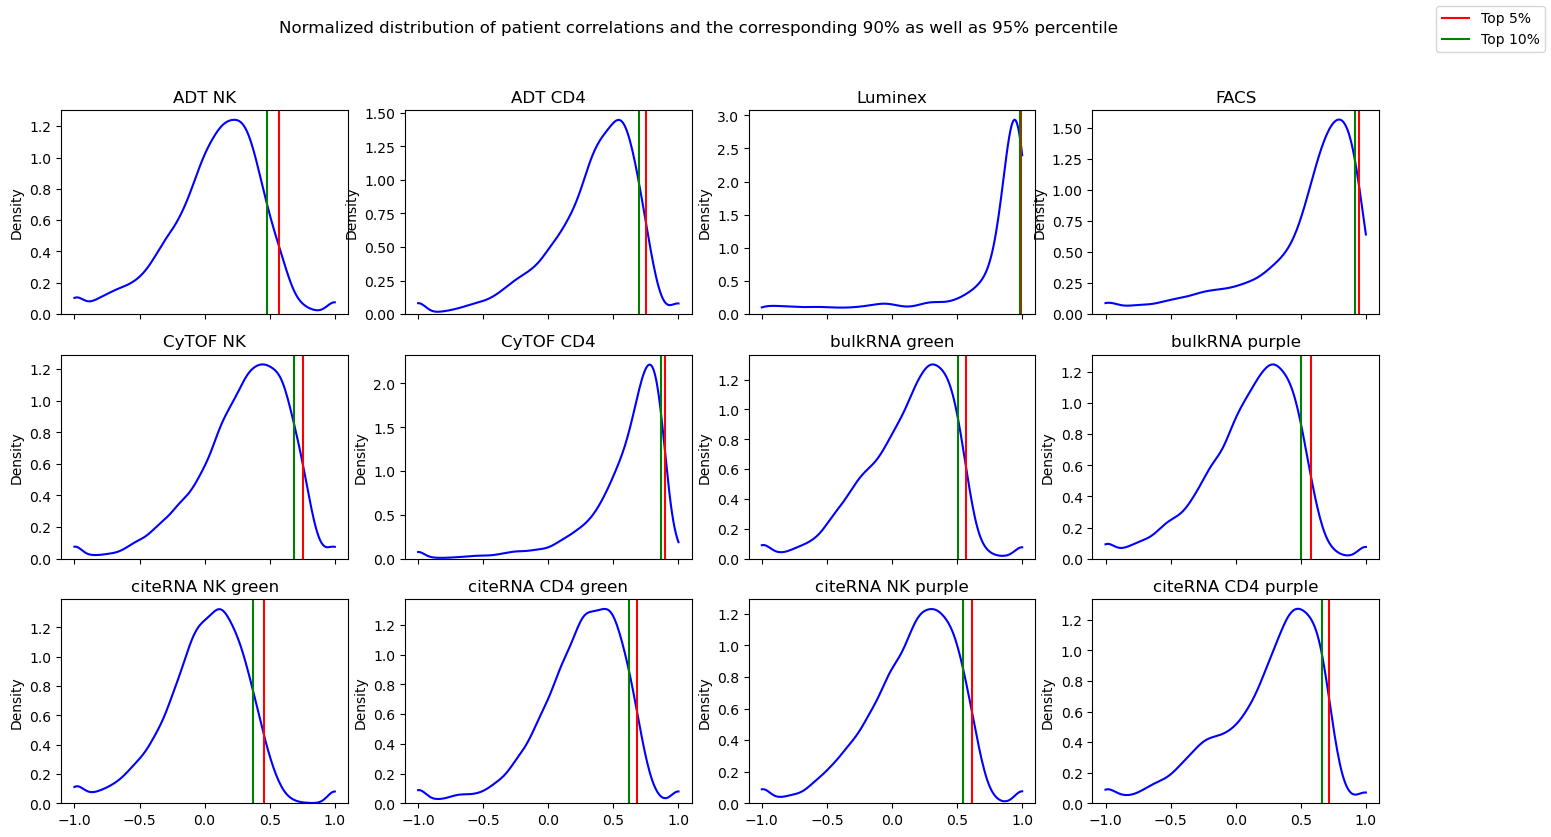

In [ ]:
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(17,9))
fig.suptitle('Normalized distribution of patient correlations and the corresponding 90% as well as 95% percentile')

sb.kdeplot(data = adt_graph_sum["NK"]["corr_scaled"], cut = 0, ax = axes[0,0], color = "blue")
five_1 = axes[0,0].axvline(adt_graph_sum["NK"]["5"]["percentile_threshhold_rescaled"], color='red' )
ten_1 = axes[0,0].axvline(adt_graph_sum["NK"]["10"]["percentile_threshhold_rescaled"], color='green' )
axes[0,0].set_title("ADT NK")

sb.kdeplot(data = adt_graph_sum["CD4"]["corr_scaled"], cut = 0, ax = axes[0,1], color = "blue")
five_2 = axes[0,1].axvline(adt_graph_sum["CD4"]["5"]["percentile_threshhold_rescaled"], color='red' )
ten_2 = axes[0,1].axvline(adt_graph_sum["CD4"]["10"]["percentile_threshhold_rescaled"], color='green' )
axes[0,1].set_title("ADT CD4")

sb.kdeplot(data = luminex_graph_sum["corr_scaled"], cut = 0, ax = axes[0,2], color = "blue")
five_3 = axes[0,2].axvline(luminex_graph_sum["5"]["percentile_threshhold_rescaled"], color='red' )
ten_3 = axes[0,2].axvline(luminex_graph_sum["10"]["percentile_threshhold_rescaled"], color='green' )
axes[0,2].set_title("Luminex")

sb.kdeplot(data = facs_graph_sum["corr_scaled"], cut = 0, ax = axes[0,3], color = "blue")
five_4 = axes[0,3].axvline(facs_graph_sum["5"]["percentile_threshhold_rescaled"], color='red' )
ten_4 = axes[0,3].axvline(facs_graph_sum["10"]["percentile_threshhold_rescaled"], color='green' )
axes[0,3].set_title("FACS")

sb.kdeplot(data = cytof_graph_sum["NK"]["corr_scaled"], cut = 0, ax = axes[1,0], color = "blue")
five_5 = axes[1,0].axvline(cytof_graph_sum["NK"]["5"]["percentile_threshhold_rescaled"], color='red' )
ten_5 = axes[1,0].axvline(cytof_graph_sum["NK"]["10"]["percentile_threshhold_rescaled"], color='green' )
axes[1,0].set_title("CyTOF NK")

sb.kdeplot(data = cytof_graph_sum["CD4"]["corr_scaled"], cut = 0, ax = axes[1,1], color = "blue")
five_6 = axes[1,1].axvline(cytof_graph_sum["CD4"]["5"]["percentile_threshhold_rescaled"], color='red' )
ten_6 = axes[1,1].axvline(cytof_graph_sum["CD4"]["10"]["percentile_threshhold_rescaled"], color='green' )
axes[1,1].set_title("CyTOF CD4")


sb.kdeplot(data = bulkRNA_graph_sum["green"]["corr_scaled"], cut = 0, ax = axes[1,2], color = "blue")
five_7 = axes[1,2].axvline(bulkRNA_graph_sum["green"]["5"]["percentile_threshhold_rescaled"], color='red' )
ten_7 = axes[1,2].axvline(bulkRNA_graph_sum["green"]["10"]["percentile_threshhold_rescaled"], color='green' )
axes[1,2].set_title("bulkRNA green")

sb.kdeplot(data = bulkRNA_graph_sum["purple"]["corr_scaled"], cut = 0, ax = axes[1,3], color = "blue")
five_8 = axes[1,3].axvline(bulkRNA_graph_sum["purple"]["5"]["percentile_threshhold_rescaled"], color='red' )
ten_8 = axes[1,3].axvline(bulkRNA_graph_sum["purple"]["10"]["percentile_threshhold_rescaled"], color='green' )
axes[1,3].set_title("bulkRNA purple")

sb.kdeplot(data = citeRNA_graph_sum["NK-green"]["corr_scaled"], cut = 0, ax = axes[2,0], color = "blue")
five_9 = axes[2,0].axvline(citeRNA_graph_sum["NK-green"]["5"]["percentile_threshhold_rescaled"], color='red' )
ten_9 = axes[2,0].axvline(citeRNA_graph_sum["NK-green"]["10"]["percentile_threshhold_rescaled"], color='green' )
axes[2,0].set_title("citeRNA NK green")

sb.kdeplot(data = citeRNA_graph_sum["CD4-green"]["corr_scaled"], cut = 0, ax = axes[2,1], color = "blue")
five_10 = axes[2,1].axvline(citeRNA_graph_sum["CD4-green"]["5"]["percentile_threshhold_rescaled"], color='red' )
ten_10 = axes[2,1].axvline(citeRNA_graph_sum["CD4-green"]["10"]["percentile_threshhold_rescaled"], color='green' )
axes[2,1].set_title("citeRNA CD4 green")

sb.kdeplot(data = citeRNA_graph_sum["NK-purple"]["corr_scaled"], cut = 0, ax = axes[2,2], color = "blue")
five_11 = axes[2,2].axvline(citeRNA_graph_sum["NK-purple"]["5"]["percentile_threshhold_rescaled"], color='red' )
ten_11 = axes[2,2].axvline(citeRNA_graph_sum["NK-purple"]["10"]["percentile_threshhold_rescaled"], color='green' )
axes[2,2].set_title("citeRNA NK purple")

sb.kdeplot(data = citeRNA_graph_sum["CD4-purple"]["corr_scaled"], cut = 0, ax = axes[2,3], color = "blue")
five_12 = axes[2,3].axvline(citeRNA_graph_sum["CD4-purple"]["5"]["percentile_threshhold_rescaled"], color='red' )
ten_12 = axes[2,3].axvline(citeRNA_graph_sum["CD4-purple"]["10"]["percentile_threshhold_rescaled"], color='green' )
axes[2,3].set_title("citeRNA CD4 purple")

#handles, labels = ax.get_legend_handles_labels()
fig.legend([five_12, ten_10], ["Top 5%", "Top 10%"], loc='upper right',)

#fig.legend(loc ='upper center')


## Top 10% Heatmaps

<Axes: >

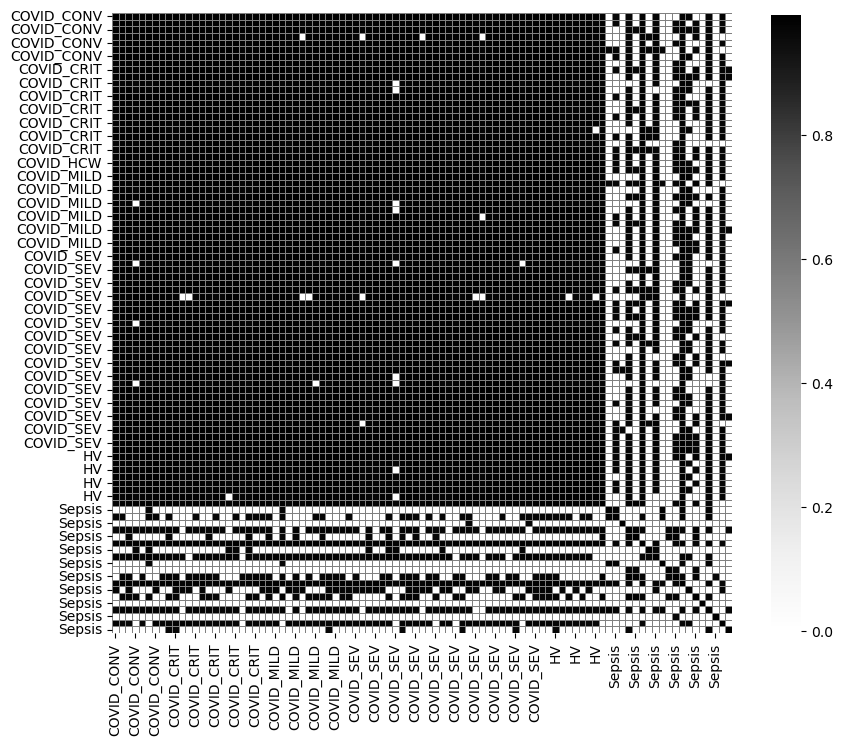

In [ ]:
for i in range(len(bulkRNA_disease_clusters_corr["cyan"]["all"].keys())): 
    for j in range(len(bulkRNA_disease_clusters_corr["cyan"]["all"].keys())): 
        y = bulkRNA_disease_clusters_corr["cyan"]["all"].iloc[i,j]
        if (y < facs_graph_sum["10"]["percentile_threshhold"]):
            bulkRNA_disease_clusters_corr["cyan"]["all"].iloc[i,j] = 0

fig,ax=plt.subplots(figsize=(10,10))
sb.heatmap(bulkRNA_disease_clusters_corr["cyan"]["all"], cmap ='Greys',  robust = True, square= True, linewidth=.5, linecolor = "grey" , ax = ax, cbar_kws={"shrink": 0.8})
#fig.suptitle('Top 10% Disease-Disease Correlation Based on bulkRNA Cyan')

Text(0.5, 0.98, 'Top 10% Disease-Disease Correlation Based on FACS')

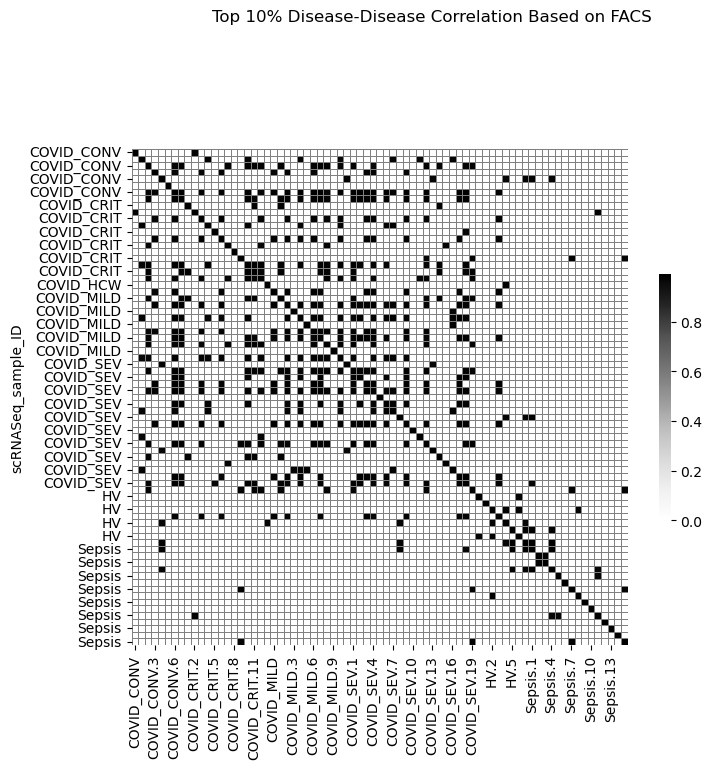

In [ ]:
for i in range(len(corr_p_facs.keys())): 
    for j in range(len(corr_p_facs.keys())): 
        y = corr_d_facs.iloc[i,j]
        if (y < facs_graph_sum["10"]["percentile_threshhold"]):
            corr_d_facs.iloc[i,j] = 0

fig,ax=plt.subplots(1,1, figsize=(8,8))
sb.heatmap(corr_d_facs, cmap ='Greys',  robust = True, square= True, linewidth=.5, linecolor = "grey" , ax = ax, cbar_kws={"shrink": 0.4})
fig.suptitle('Top 10% Disease-Disease Correlation Based on FACS')

Text(0.5, 0.98, 'Top 10% Patient-Patient as well as Disease-Disease Correlation Based on FACS')

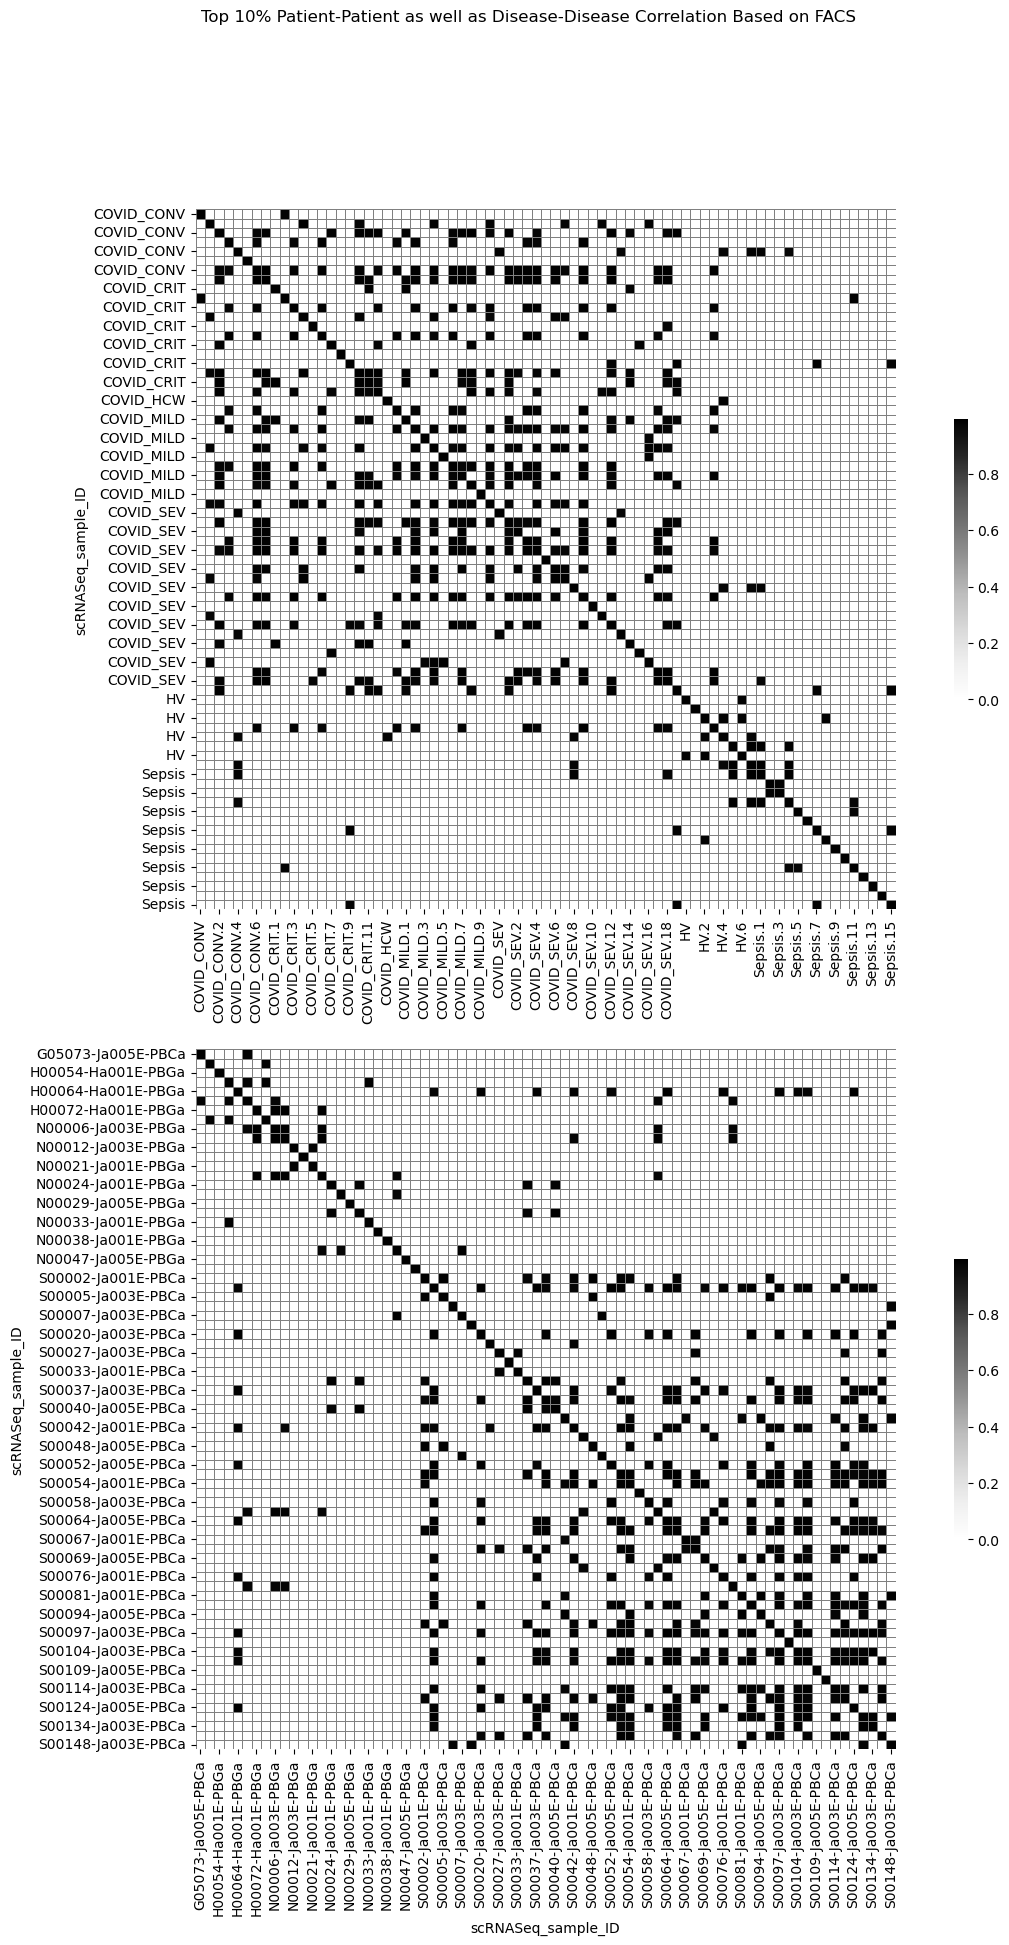

In [ ]:
for i in range(len(corr_p_facs.keys())): 
    for j in range(len(corr_p_facs.keys())): 
        x = corr_p_facs.iloc[i,j]
        y = corr_d_facs.iloc[i,j]
        if (x < facs_graph_sum["10"]["percentile_threshhold"]):
            corr_p_facs.iloc[i,j] = 0
        if (y < facs_graph_sum["10"]["percentile_threshhold"]):
            corr_d_facs.iloc[i,j] = 0

fig,ax=plt.subplots(2,1, figsize=(15,20))
sb.heatmap(corr_p_facs, cmap ='Greys',  robust = True, square= True, linewidth=.5, linecolor = "grey" , ax = ax[1], cbar_kws={"shrink": 0.4})
sb.heatmap(corr_d_facs, cmap ='Greys',  robust = True, square= True, linewidth=.5, linecolor = "grey" , ax = ax[0], cbar_kws={"shrink": 0.4})
fig.suptitle('Top 10% Patient-Patient as well as Disease-Disease Correlation Based on FACS')

Text(0.5, 0.98, 'Top 10% Patient-Patient as well as Disease-Disease Correlation Based on Luminex')

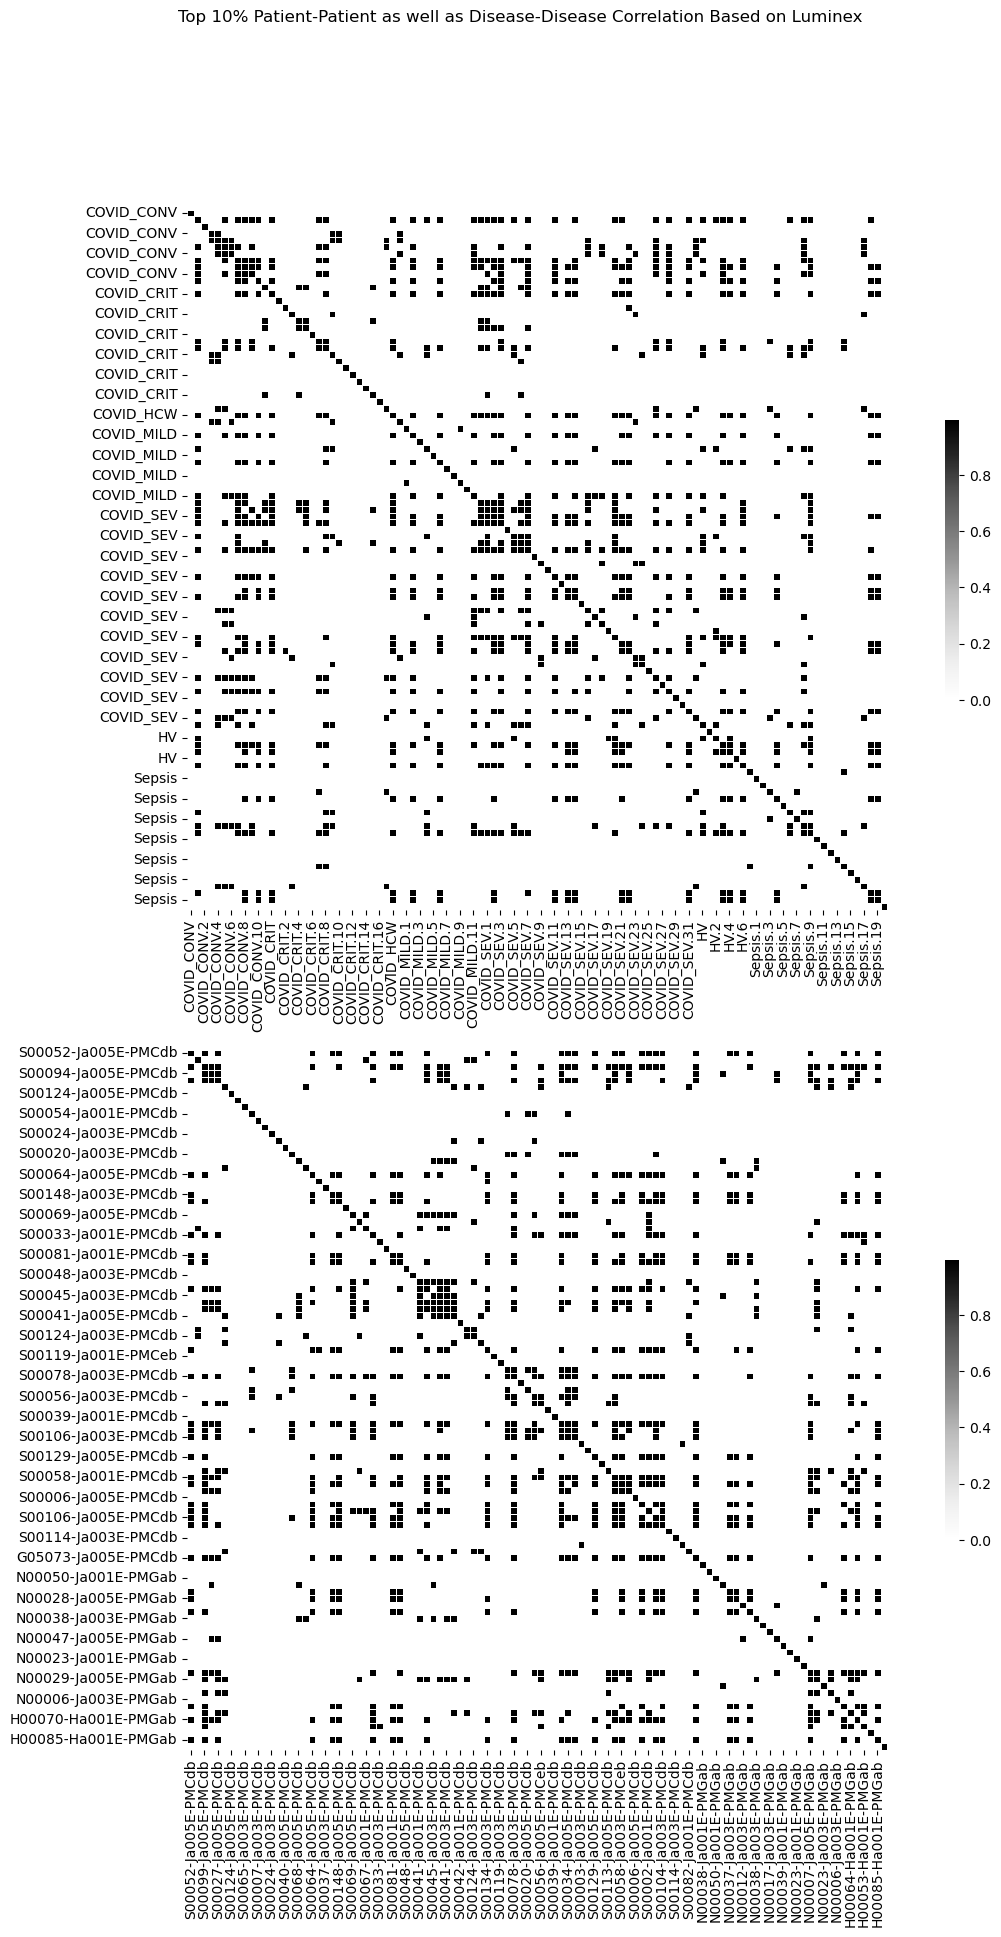

In [ ]:
for i in range(len(corr_p_luminex.keys())): 
    for j in range(len(corr_p_luminex.keys())): 
        x = corr_p_luminex.iloc[i,j]
        y = corr_d_luminex.iloc[i,j]
        if (x < luminex_graph_sum["10"]["percentile_threshhold"]):
            corr_p_luminex.iloc[i,j] = 0
        if (y < luminex_graph_sum["10"]["percentile_threshhold"]):
            corr_d_luminex.iloc[i,j] = 0

fig,ax=plt.subplots(2,1, figsize=(15,20))
sb.heatmap(corr_p_luminex, cmap ='Greys',  robust = True, square= True, linewidth=.5, linecolor = "white" , ax = ax[1], cbar_kws={"shrink": 0.4})
sb.heatmap(corr_d_luminex, cmap ='Greys',  robust = True, square= True, linewidth=.5, linecolor = "white" , ax = ax[0], cbar_kws={"shrink": 0.4})
fig.suptitle('Top 10% Patient-Patient as well as Disease-Disease Correlation Based on Luminex')

In [ ]:
########FIX###############

# Avergae Correlation of the Patients of the same disease
module_intra_disease_avg = {m:[0] * len(diseases) for m in bulkRNA_disease_clusters_corr.keys() }
# Avergae Correlation of the Patients of two different diseases
module_inter_disease_avg = {ct:[0] * len(disease_pairs) for ct in bulkRNA_disease_clusters_corr.keys() }

for m in bulkRNA_disease_clusters_corr.keys():
    for i, disease in enumerate(diseases):
        for row in range(len(bulkRNA_disease_clusters_corr[m]["intra_diseases"][disease].keys())): 
            for col in range(len(bulkRNA_disease_clusters_corr[m]["intra_diseases"][disease].keys())):
                x = bulkRNA_disease_clusters_corr[m]["intra_diseases"][disease].iloc[row, col]
                if (x < bulkRNA_graph_sum[m]["10"]["percentile_threshhold"]):
                    bulkRNA_disease_clusters_corr[m]["intra_diseases"][disease].iloc[row, col] = 0
        module_intra_disease_avg[m][i] = bulkRNA_disease_clusters_corr[m]["intra_diseases"][disease].mean().mean()

    for i, pair in enumerate(disease_pairs):
        for row in range(len(bulkRNA_disease_clusters_corr[m]["inter_diseases"][pair].index)): 
            for col in range(len(bulkRNA_disease_clusters_corr[m]["inter_diseases"][pair].columns)):
                x = bulkRNA_disease_clusters_corr[m]["inter_diseases"][pair].iloc[row, col]
                if (x < bulkRNA_graph_sum[m]["10"]["percentile_threshhold"]):
                    bulkRNA_disease_clusters_corr[m]["inter_diseases"][pair].iloc[row, col] = 0

        module_inter_disease_avg[m][i] = bulkRNA_disease_clusters_corr[m]["inter_diseases"][pair].mean().mean()
    
        
df1 = pd.DataFrame(data = module_intra_disease_avg, index = diseases)        
df2 = pd.DataFrame(data = module_inter_disease_avg, index = disease_pairs)

fig,ax=plt.subplots(1,2, figsize=(22,22))

sb.heatmap(df1, cmap ='Greys',  robust = True, linewidth=.5, square= True, linecolor = "grey", cbar_kws={"shrink": 0.2}, ax=ax[0])
sb.heatmap(df2, cmap ='Greys',  robust = True, square= True, linewidth=.5, linecolor = "grey", cbar_kws={"shrink": 0.2}, ax=ax[1])

fig.suptitle('Top 10% Module-Disease Correlation Based on bulkRNA')


NameError: name 'diseases' is not defined

## Summary Statistics

In [ ]:
singletone = {"10":[], "5":[], "3":[], "1":[]}
singletone_percent = {"10":[], "5":[], "3":[], "1":[]}
communities = {"10":[], "5":[], "3":[], "1":[]}
communities_wo_singletones = {"10":[], "5":[], "3":[], "1":[]}
largest_clique_size = {"10":[], "5":[], "3":[], "1":[]}
mean_degree = {"10":[], "5":[], "3":[], "1":[]}
mean_degree_percent = {"10":[], "5":[], "3":[], "1":[]}
num_edges = {"10":[], "5":[], "3":[], "1":[]}


In [ ]:
for key in singletone.keys():
    singletone[key].append(luminex_graph_sum[key]["num_isolated_nodes"])
    communities[key].append(luminex_graph_sum[key]["num_communities"])
    largest_clique_size[key].append(luminex_graph_sum[key]["largest_clique_size"])
    mean_degree[key].append(luminex_graph_sum[key]["mean_degree"])
    mean_degree_percent[key].append(luminex_graph_sum[key]["mean_degree"] / (luminex_graph_sum["num_vertices"] * luminex_graph_sum["num_vertices"]) * 100)
    num_edges[key].append(luminex_graph_sum[key]["num_edges"])
    singletone_percent[key].append(luminex_graph_sum[key]["num_isolated_nodes"]/ luminex_graph_sum["num_vertices"] * 100)
    communities_wo_singletones[key].append((luminex_graph_sum[key]["num_communities"] - luminex_graph_sum[key]["num_isolated_nodes"]))

In [ ]:
for key in singletone.keys():
    singletone[key].append(facs_graph_sum[key]["num_isolated_nodes"])
    communities[key].append(facs_graph_sum[key]["num_communities"])
    largest_clique_size[key].append(facs_graph_sum[key]["largest_clique_size"])
    mean_degree[key].append(facs_graph_sum[key]["mean_degree"])
    mean_degree_percent[key].append(facs_graph_sum[key]["mean_degree"] / (facs_graph_sum["num_vertices"] * facs_graph_sum["num_vertices"]) * 100)
    num_edges[key].append(facs_graph_sum[key]["num_edges"])
    singletone_percent[key].append(facs_graph_sum[key]["num_isolated_nodes"]/ facs_graph_sum["num_vertices"] * 100)
    communities_wo_singletones[key].append((facs_graph_sum[key]["num_communities"] - facs_graph_sum[key]["num_isolated_nodes"]))

In [ ]:
for ct in adt_graph_sum.keys():
    for key in singletone.keys():
        singletone[key].append(adt_graph_sum[ct][key]["num_isolated_nodes"])
        communities[key].append(adt_graph_sum[ct][key]["num_communities"])
        largest_clique_size[key].append(adt_graph_sum[ct][key]["largest_clique_size"])
        mean_degree[key].append(adt_graph_sum[ct][key]["mean_degree"])
        mean_degree_percent[key].append(adt_graph_sum[ct][key]["mean_degree"] / (adt_graph_sum[ct]["num_vertices"] * adt_graph_sum[ct]["num_vertices"]) * 100)
        num_edges[key].append(adt_graph_sum[ct][key]["num_edges"])
        singletone_percent[key].append(adt_graph_sum[ct][key]["num_isolated_nodes"]/ adt_graph_sum[ct]["num_vertices"] * 100)
        communities_wo_singletones[key].append((adt_graph_sum[ct][key]["num_communities"] - adt_graph_sum[ct][key]["num_isolated_nodes"]))


In [ ]:
for ct in cytof_graph_sum.keys():
    for key in singletone.keys():
        singletone[key].append(cytof_graph_sum[ct][key]["num_isolated_nodes"])
        communities[key].append(cytof_graph_sum[ct][key]["num_communities"])
        largest_clique_size[key].append(cytof_graph_sum[ct][key]["largest_clique_size"])
        mean_degree[key].append(cytof_graph_sum[ct][key]["mean_degree"])
        mean_degree_percent[key].append(cytof_graph_sum[ct][key]["mean_degree"] / (cytof_graph_sum[ct]["num_vertices"] * cytof_graph_sum[ct]["num_vertices"]) * 100)
        num_edges[key].append(cytof_graph_sum[ct][key]["num_edges"])
        singletone_percent[key].append(cytof_graph_sum[ct][key]["num_isolated_nodes"]/ cytof_graph_sum[ct]["num_vertices"] * 100)
        communities_wo_singletones[key].append((cytof_graph_sum[ct][key]["num_communities"] - cytof_graph_sum[ct][key]["num_isolated_nodes"]))


In [ ]:
for m in bulkRNA_graph_sum.keys():
    for key in singletone.keys():
        singletone[key].append(bulkRNA_graph_sum[m][key]["num_isolated_nodes"])
        communities[key].append(bulkRNA_graph_sum[m][key]["num_communities"])
        largest_clique_size[key].append(bulkRNA_graph_sum[m][key]["largest_clique_size"])
        mean_degree[key].append(bulkRNA_graph_sum[m][key]["mean_degree"])
        mean_degree_percent[key].append(bulkRNA_graph_sum[m][key]["mean_degree"] / ( bulkRNA_graph_sum[m]["num_vertices"] *  bulkRNA_graph_sum[m]["num_vertices"]) * 100)
        num_edges[key].append(bulkRNA_graph_sum[m][key]["num_edges"])
        singletone_percent[key].append(bulkRNA_graph_sum[m][key]["num_isolated_nodes"]/ bulkRNA_graph_sum[m]["num_vertices"] * 100)
        communities_wo_singletones[key].append((bulkRNA_graph_sum[m][key]["num_communities"] - bulkRNA_graph_sum[m][key]["num_isolated_nodes"]))

In [ ]:
for m in citeRNA_graph_sum.keys():
    for key in singletone.keys():
        singletone[key].append(citeRNA_graph_sum[m][key]["num_isolated_nodes"])
        communities[key].append(citeRNA_graph_sum[m][key]["num_communities"])
        largest_clique_size[key].append(citeRNA_graph_sum[m][key]["largest_clique_size"])
        mean_degree[key].append(citeRNA_graph_sum[m][key]["mean_degree"])
        mean_degree_percent[key].append(citeRNA_graph_sum[m][key]["mean_degree"] / (citeRNA_graph_sum[m]["num_vertices"] * citeRNA_graph_sum[m]["num_vertices"]) * 100 )
        num_edges[key].append(citeRNA_graph_sum[m][key]["num_edges"])
        singletone_percent[key].append(citeRNA_graph_sum[m][key]["num_isolated_nodes"]/ citeRNA_graph_sum[m]["num_vertices"] * 100)
        communities_wo_singletones[key].append((citeRNA_graph_sum[m][key]["num_communities"] - citeRNA_graph_sum[m][key]["num_isolated_nodes"]))

Text(0, 0.5, 'Edge Density in Percent')

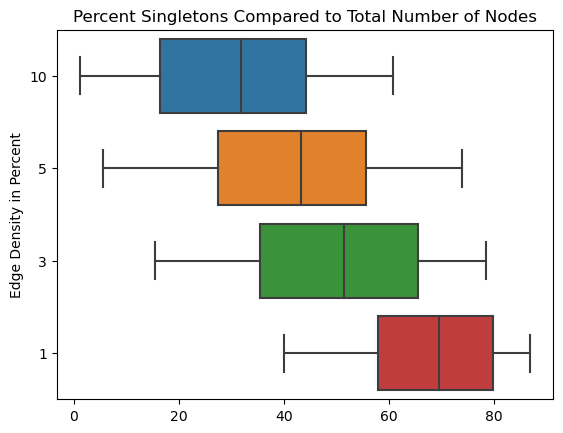

In [ ]:
x = pd.DataFrame(singletone_percent)
ax = sb.boxplot(data=x, orient="h")
plt.title("Percent Singletons Compared to Total Number of Nodes")
plt.ylabel("Edge Density in Percent")

Text(0, 0.5, 'Edge Density in Percent')

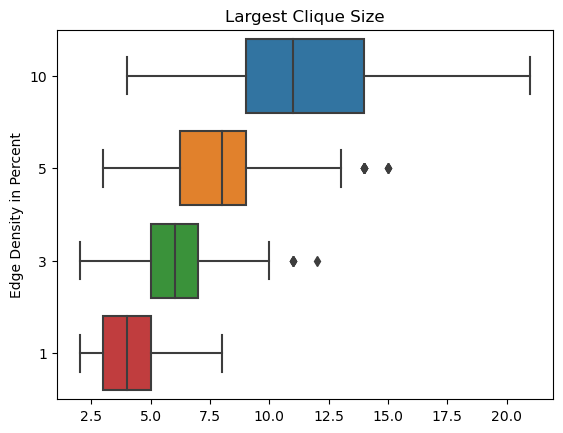

In [ ]:
x = pd.DataFrame(largest_clique_size)
ax = sb.boxplot(data=x, orient="h")
plt.title("Largest Clique Size")
plt.ylabel("Edge Density in Percent")

Text(0, 0.5, 'Edge Density in Percent')

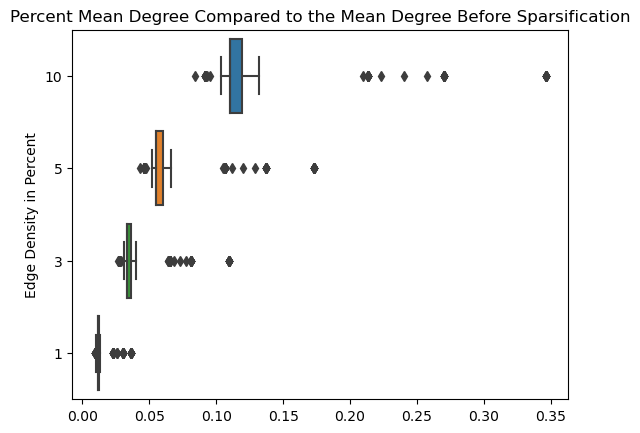

In [ ]:
x = pd.DataFrame(mean_degree_percent)
ax = sb.boxplot(data=x, orient="h")
plt.title("Percent Mean Degree Compared to the Mean Degree Before Sparsification")
plt.ylabel("Edge Density in Percent")

Text(0, 0.5, 'Edge Density in Percent')

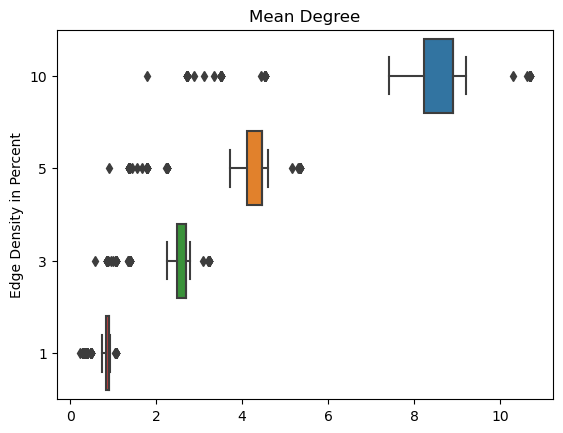

In [ ]:
x = pd.DataFrame(mean_degree)
ax = sb.boxplot(data=x, orient="h")
plt.title("Mean Degree")
plt.ylabel("Edge Density in Percent")

Text(0, 0.5, 'Edge Density in Percent')

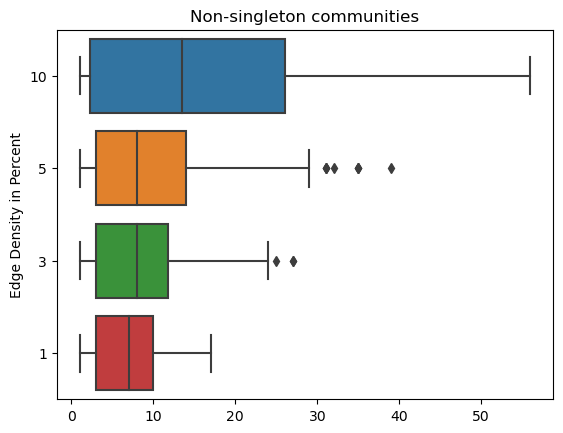

In [ ]:
x = pd.DataFrame(communities_wo_singletones)
ax = sb.boxplot(data=x, orient="h")
plt.title("Non-singleton communities")
plt.ylabel("Edge Density in Percent")

### FACS

In [ ]:
data_facs = pd.read_csv(os.path.join(graph_sum, "facs_df_graph_stats.csv"))[["num_edges", "mean_degree", "largest_clique_size", "num_isolated_nodes", "num_communities", "percentile"]]
data_luminex = pd.read_csv(os.path.join(graph_sum, "luminex_df_graph_stats.csv"))[["num_edges", "mean_degree", "largest_clique_size", "num_isolated_nodes", "num_communities", "percentile"]]

/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_10923/2785067069.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  color = {key:("blue" if float(data_facs[data_facs["percentile"] == key]["num_edges"]) <= data_facs["num_edges"].mean() else "steelblue") for key in data_facs["percentile"]}
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_10923/2785067069.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  color = {key:("blue" if float(data_facs[data_facs["percentile"] == key]["mean_degree"]) <= data_facs["mean_degree"].mean() else "steelblue") for key in data_facs["percentile"]}
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_10923/2785067069.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Us

Text(0.5, 1.0, 'FACS')

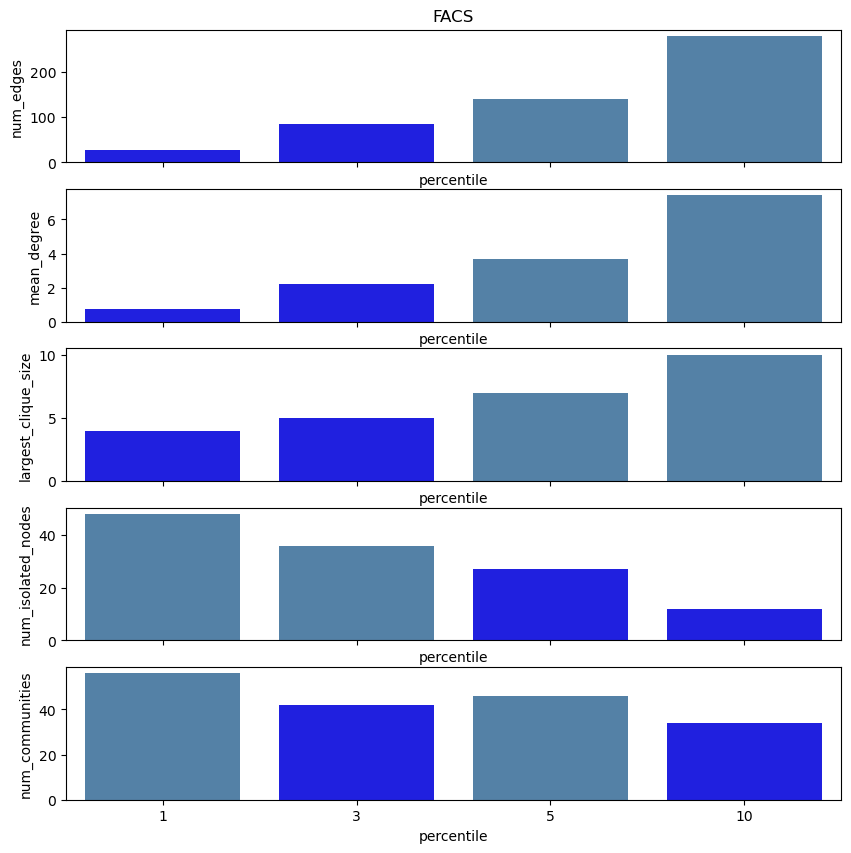

In [ ]:
fig,ax=plt.subplots(5,1, figsize=(10,10), sharex=True)

color = {key:("blue" if float(data_facs[data_facs["percentile"] == key]["num_edges"]) <= data_facs["num_edges"].mean() else "steelblue") for key in data_facs["percentile"]}
sb.barplot(data = data_facs, x="percentile", y="num_edges", ax = ax[0], palette=color)

color = {key:("blue" if float(data_facs[data_facs["percentile"] == key]["mean_degree"]) <= data_facs["mean_degree"].mean() else "steelblue") for key in data_facs["percentile"]}
sb.barplot(data = data_facs, x="percentile", y="mean_degree",ax = ax[1], palette=color)

color = {key:("blue" if float(data_facs[data_facs["percentile"] == key]["largest_clique_size"]) <= data_facs["largest_clique_size"].mean() else "steelblue") for key in data_facs["percentile"]}
sb.barplot(data = data_facs, x="percentile", y="largest_clique_size",ax = ax[2], palette=color)

color = {key:("blue" if float(data_facs[data_facs["percentile"] == key]["num_isolated_nodes"]) <= data_facs["num_isolated_nodes"].mean() else "steelblue") for key in data_facs["percentile"]}
sb.barplot(data = data_facs, x="percentile", y="num_isolated_nodes",ax = ax[3], palette=color)

color = {key:("blue" if float(data_facs[data_facs["percentile"] == key]["num_communities"]) <= data_facs["num_communities"].mean() else "steelblue") for key in data_facs["percentile"]}
sb.barplot(data = data_facs, x="percentile", y="num_communities",ax = ax[4], palette=color)

ax[0].set_title("FACS")


/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_10923/167671905.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  color = {key:("blue" if float(data_luminex[data_luminex["percentile"] == key]["num_edges"]) <= data_luminex["num_edges"].mean() else "steelblue") for key in data_luminex["percentile"]}
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_10923/167671905.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  color = {key:("blue" if float(data_luminex[data_luminex["percentile"] == key]["mean_degree"]) <= data_luminex["mean_degree"].mean() else "steelblue") for key in data_luminex["percentile"]}
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_10923/167671905.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

Text(0.5, 1.0, 'Luminex')

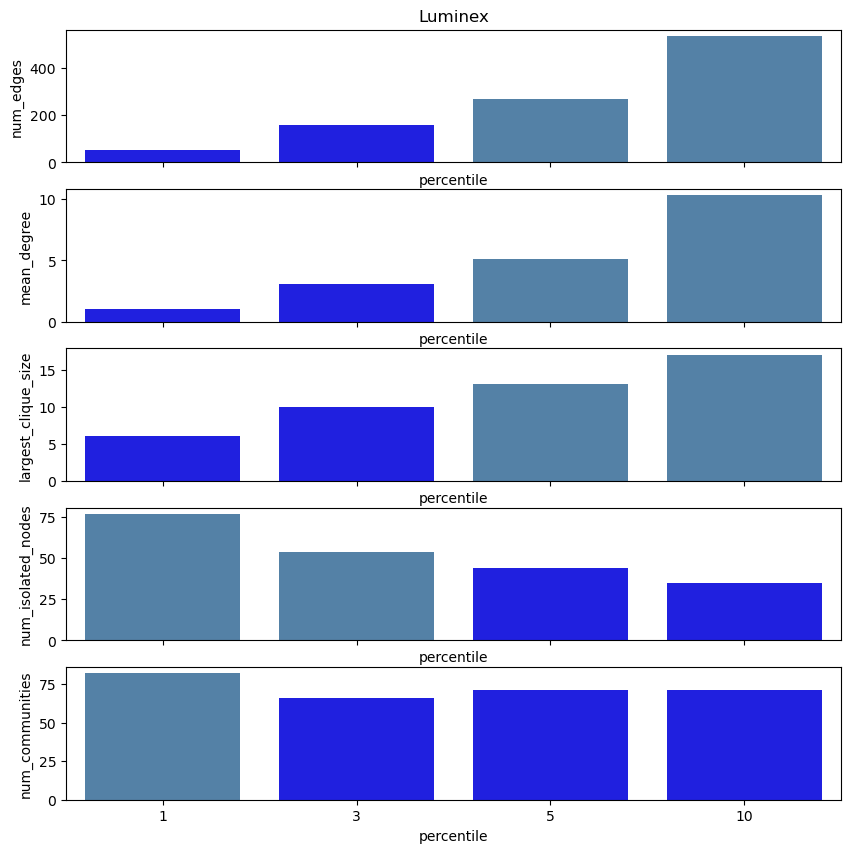

In [ ]:
fig,ax=plt.subplots(5,1, figsize=(10,10), sharex=True)

color = {key:("blue" if float(data_luminex[data_luminex["percentile"] == key]["num_edges"]) <= data_luminex["num_edges"].mean() else "steelblue") for key in data_luminex["percentile"]}
sb.barplot(data = data_luminex, x="percentile", y="num_edges", ax = ax[0], palette=color)

color = {key:("blue" if float(data_luminex[data_luminex["percentile"] == key]["mean_degree"]) <= data_luminex["mean_degree"].mean() else "steelblue") for key in data_luminex["percentile"]}
sb.barplot(data = data_luminex, x="percentile", y="mean_degree",ax = ax[1], palette=color)

color = {key:("blue" if float(data_luminex[data_luminex["percentile"] == key]["largest_clique_size"]) <= data_luminex["largest_clique_size"].mean() else "steelblue") for key in data_luminex["percentile"]}
sb.barplot(data = data_luminex, x="percentile", y="largest_clique_size",ax = ax[2], palette=color)

color = {key:("blue" if float(data_luminex[data_luminex["percentile"] == key]["num_isolated_nodes"]) <= data_luminex["num_isolated_nodes"].mean() else "steelblue") for key in data_luminex["percentile"]}
sb.barplot(data = data_luminex, x="percentile", y="num_isolated_nodes",ax = ax[3], palette=color)

color = {key:("blue" if float(data_luminex[data_luminex["percentile"] == key]["num_communities"]) <= data_luminex["num_communities"].mean() else "steelblue") for key in data_luminex["percentile"]}
sb.barplot(data = data_luminex, x="percentile", y="num_communities",ax = ax[4], palette=color)

ax[0].set_title("Luminex")

In [ ]:
# Read graph summary csv files
data_cytof = pd.read_csv(os.path.join(graph_sum, "cytof_df_graph_stats.csv"))[["num_edges", "mean_degree", "largest_clique_size", "num_isolated_nodes", "num_communities", "percentile", "cell types"]]
data_citeRNA = pd.read_csv(os.path.join(graph_sum, "citeRNA_df_graph_stats.csv"))[["num_edges", "mean_degree", "largest_clique_size", "num_isolated_nodes", "num_communities", "percentile", "cell types - modules"]]
data_adt = pd.read_csv(os.path.join(graph_sum, "adt_df_graph_stats.csv"))[["num_edges", "mean_degree", "largest_clique_size", "num_isolated_nodes", "num_communities", "percentile", "cell types"]]
data_bulkRNA = pd.read_csv(os.path.join(graph_sum, "bulkRNA_df_graph_stats.csv"))[["num_edges", "mean_degree", "largest_clique_size", "num_isolated_nodes", "num_communities", "percentile", "modules"]]

In [ ]:
# Unify the column names
data_bulkRNA.rename(columns={"modules" : "category"}, inplace=True)
data_cytof.rename(columns={"cell types" : "category"}, inplace=True)
data_adt.rename(columns={"cell types" : "category"}, inplace=True)
data_citeRNA.rename(columns={"cell types - modules" : "category"}, inplace=True)

In [ ]:
# Remove the noise if not already done
for i in data_cytof.index:
    if str(data_cytof.loc[i, "category"]) == "nan":
        data_cytof.drop(i, inplace=True)

for i in data_adt.index:
    if str(data_adt.loc[i, "category"]) == "nan":
        data_adt.drop(i, inplace=True)

data_bulkRNA.drop(data_bulkRNA[data_bulkRNA["category"] == "grey"].index, inplace=True)

for i in data_citeRNA.index:
    if data_citeRNA.loc[i, "category"].find("nan") >= 0 or (data_citeRNA.loc[i, "category"].find("grey") >= 0 and data_citeRNA.loc[i, "category"].find("grey60") == -1 ):
        data_citeRNA.drop(i, inplace=True)

In [ ]:
modules = [data_bulkRNA, data_cytof, data_adt, data_citeRNA]
module_names = ["bulkRNA", "cytof", "adt", "citeRNA"]

In [ ]:
for j, m in enumerate(modules): 
    categories = list(m["category"].unique())
    for i, c in enumerate(categories):
        if i % 4 == 0 : # generate a new plot 
            if i > 0:
                name = module_names[j] 
                for k in range(len(cats)):
                    name = name + "_" + str(cats[k]) 
                fig.suptitle(module_names[j])
                fig.savefig(os.path.join(plots, name )) # save the old plot
            fig,ax=plt.subplots(5,4, figsize=(20,15), sharex=True)
            cats = []

        cats.append(c) # name of the categories that are in this plot 
        data = m[m["category"] == c]

        color = {key:("blue" if float(data[data["percentile"] == key]["num_edges"]) <= data["num_edges"].mean() else "steelblue") for key in data["percentile"]}
        sb.barplot(data = data, x="percentile", y="num_edges", ax = ax[0, i % 4], palette=color)

        color = {key:("blue" if float(data[data["percentile"] == key]["mean_degree"]) <= data["mean_degree"].mean() else "steelblue") for key in data["percentile"]}
        sb.barplot(data = data, x="percentile", y="mean_degree",ax = ax[1, i % 4], palette=color)

        color = {key:("blue" if float(data[data["percentile"] == key]["largest_clique_size"]) <= data["largest_clique_size"].mean() else "steelblue") for key in data["percentile"]}
        sb.barplot(data = data, x="percentile", y="largest_clique_size",ax = ax[2, i % 4], palette=color)

        color = {key:("blue" if float(data[data["percentile"] == key]["num_isolated_nodes"]) <= data["num_isolated_nodes"].mean() else "steelblue") for key in data["percentile"]}
        sb.barplot(data = data, x="percentile", y="num_isolated_nodes",ax = ax[3, i % 4], palette=color)

        color = {key:("blue" if float(data[data["percentile"] == key]["num_communities"]) <= data["num_communities"].mean() else "steelblue") for key in data["percentile"]}
        sb.barplot(data = data, x="percentile", y="num_communities",ax = ax[4, i % 4], palette=color)
            
        ax[0, i % 4].set_title(c)

        if i == (len(categories) - 1): # Save the last plot
            name = module_names[j] 
            for k in range(len(cats)):
                name = name + "_" + str(cats[k]) 
            fig.suptitle(module_names[j])
            fig.savefig(os.path.join(plots, name )) 

/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_10923/1761588820.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  color = {key:("blue" if float(data[data["percentile"] == key]["num_edges"]) <= data["num_edges"].mean() else "steelblue") for key in data["percentile"]}
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_10923/1761588820.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  color = {key:("blue" if float(data[data["percentile"] == key]["mean_degree"]) <= data["mean_degree"].mean() else "steelblue") for key in data["percentile"]}
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_10923/1761588820.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  color 

KeyboardInterrupt: 